# Graded Challenge 4

# Unsupervised Learning

Nama : Raditya Saputra

Batch : 007 FTDS

# Perkenalan

Hal ini membutuhkan pengembangan segmentasi pelanggan untuk menentukan strategi pemasaran. Sampel Dataset merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File berada pada level pelanggan dengan 18 variabel perilaku.
Berikut Dataset Kartu Kredit :

- CUSTID : Identitas Pemegang Kartu Kredit (Kategoris)
- SALDO : Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian
- BALANCEFREQUENCY : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
- PURCHASES : Jumlah pembelian yang dilakukan dari akun
- ONEOFFPURCHASES : Jumlah pembelian maksimum dilakukan dalam sekali jalan
- INSTALLMENTS_PURCHASES : Jumlah pembelian yang dilakukan secara mencicil
- CASHADVANCE: Uang tunai di muka yang diberikan oleh pengguna
- PURCHASES_FREQUENCY : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
- ONEOFFPURCHASESFREQUENCY : Seberapa sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)
- PURCHASES_INSTALLMENTS_FREQUENCY : Seberapa sering dilakukan pembelian secara mencicil (1 = sering dilakukan, 0 = tidak sering dilakukan)
- CASH_ADVANCE_FREQUENCY : Seberapa sering uang tunai di muka dibayarkan
- CASHADVANCETRX : Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"
- PURCHASESTRX : Jumlah transaksi pembelian yang dilakukan
- CREDITLIMIT : Batas Kartu Kredit untuk pengguna
- PAYMENTS : Jumlah Pembayaran yang dilakukan oleh pengguna
- MINIMUM_PAYMENTS : Jumlah pembayaran minimum yang dilakukan oleh pengguna
- PRCFULLPAYMENT : Persentase pembayaran penuh yang dibayarkan oleh pengguna
- TENURE : Jangka waktu layanan kartu kredit untuk pengguna

# Import Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
import warnings
warnings.simplefilter(action='ignore')

# Data Loading

In [2]:
df = pd.read_csv('CC_GENERAL.csv',thousands=',')
pd.set_option('display.max_columns', None)

# Exploratory Dataset Analysis

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Gambaran sekilas dataset, dataset terdiri dari 8950 baris dan 18 kolum

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Dataset terdiri dari 17 tipe data numerikal dan 1 object

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Tidak ada anomaly data dilihat dari informasi statistika dataset

In [6]:
df[df.duplicated(keep=False)].sort_values(by='BALANCE')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


Tidak ada duplikat data

In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Ada 2 buah data yang missing values, yaitu MINIMUM_PAYMENT dan CREDIT_LIMIT

In [8]:
nan_rows_name = df[df['MINIMUM_PAYMENTS'].isnull()]
nan_rows_name

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [9]:
(df.isnull().sum()/df['CUST_ID'].count())*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

Tidak ada hubungan antar fitur dengan MINIMUM_PAYMENTS dan CREDIT_LIMIT mengalami kekosongan dan selanjutnya akan dihapus karena jumlah nya 3% dan 1%, begitu juga kolum CUST_ID akan dihapus karena bertipe objek

In [10]:
credit_limit_miss = df[df['CREDIT_LIMIT'].isnull()]
credit_limit_miss

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


Handling Missing Values

In [11]:
df.dropna(inplace=True)
df = df.drop(df[(df['CUST_ID'] == 'C15349')].index)
df = df.drop(['CUST_ID'],axis = 1)

Visualisasi

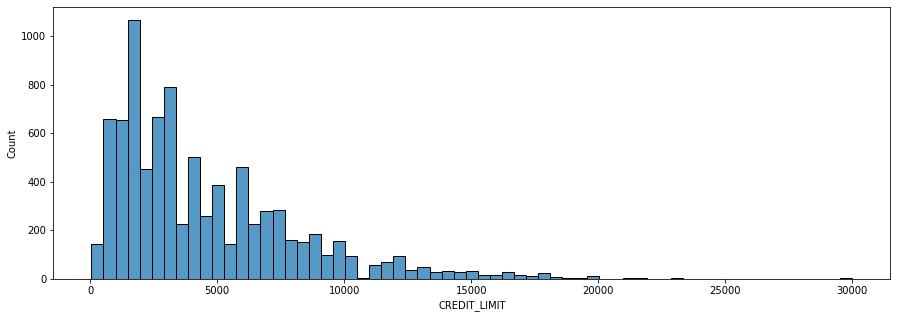

In [12]:
plt.figure(figsize = (15,5))
sns.histplot(df['CREDIT_LIMIT'])
plt.show()

Sebagian besar pemegang kartu kredit memiliki limit kredit rendah

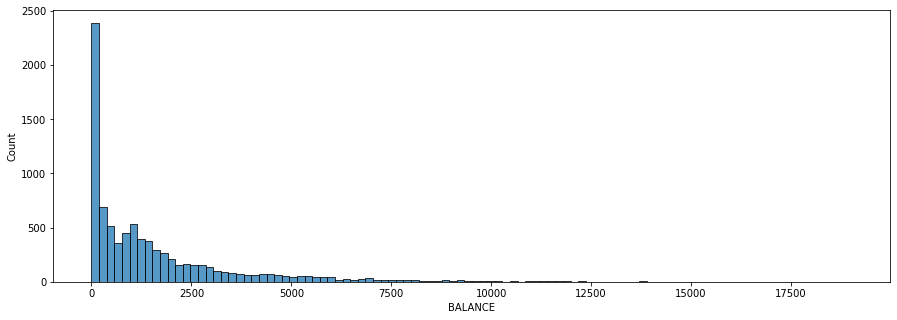

In [13]:
plt.figure(figsize = (15,5))
sns.histplot(df['BALANCE'])
plt.show()

Sebagian besar pemegang kartu kredit memiliki saldo kredit di bawah 7500 hal ini berhubungan dengan limit kredit yang diberikan

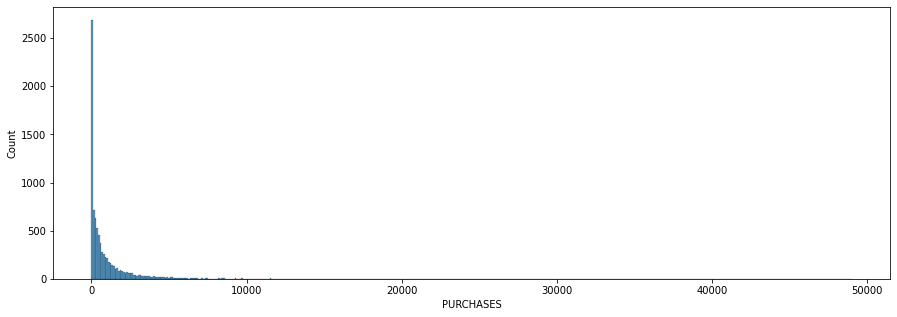

In [14]:
plt.figure(figsize = (15,5))
sns.histplot(df['PURCHASES'])
plt.show()

Dengan jumlah saldo yang sedikit pembelian yang dilakukan pun juga sedikit, karena keterbatasan saldo dan limit kredit. Itu masuk akal saling berhubungan

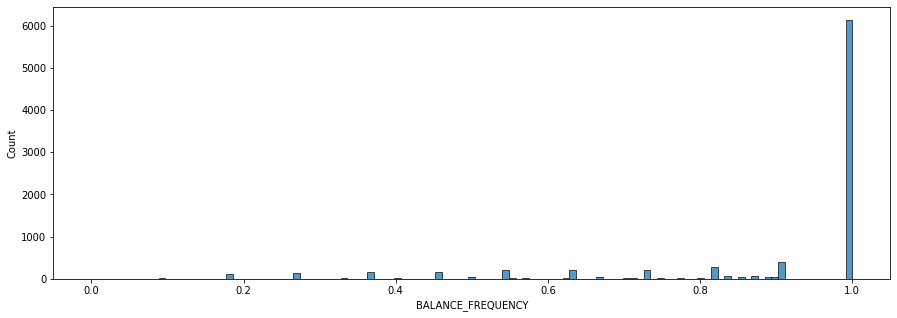

In [15]:
plt.figure(figsize = (15,5))
sns.histplot(df['BALANCE_FREQUENCY'])
plt.show()

Menarik nya Saldo sangat sering diperbarui

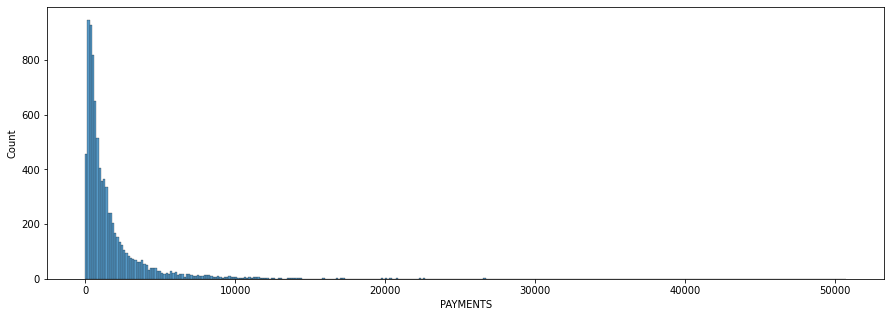

In [16]:
plt.figure(figsize = (15,5))
sns.histplot(df['PAYMENTS'])
plt.show()

Kebanyakan orang telah melakukan pembayaran total di bawah 10.000

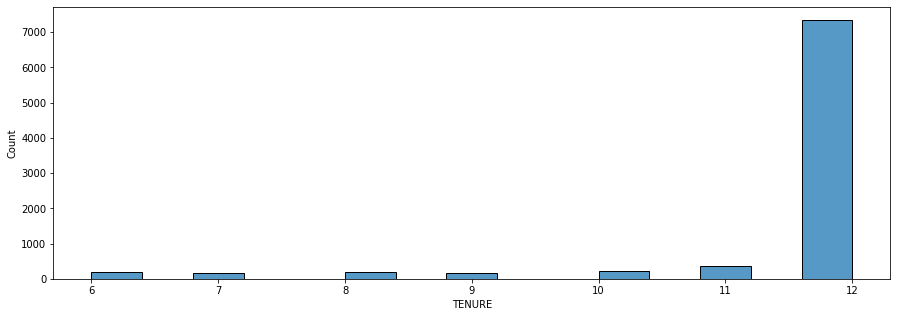

In [17]:
plt.figure(figsize = (15,5))
sns.histplot(df['TENURE'])
plt.show()

Dalam 6 bulan terakhir sebagian besar pemegang kartu kredit memiliki jangka waktu layanan selama 12 bulan

# Data Preprocessing

In [68]:
kmeans = df.copy()
gau = df.copy()
db = df.copy()

Membuat salinan data untuk dibuat permodel, untuk model yang digunakan ialah :
- KMeans
- Agglomerative Clustering
- DBSCAN

In [69]:
scaler = StandardScaler()
kmeans_scal = scaler.fit_transform(kmeans)
gau = scaler.fit_transform(gau)
db = scaler.fit_transform(db)

Preprocessing dilakukan dengan scaling standarscaler

# Modeling

# KMeans

In [105]:
km = KMeans(n_clusters = 4)
km.fit(kmeans_scal)
full_preds = km.predict(kmeans_scal)

cluster diisi dengan 4 cluster

In [106]:
cluster_df = pd.DataFrame(kmeans,columns = df.columns)
cluster_df['clusters'] = full_preds

In [107]:
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,1
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


untuk membangun elbow method yang dibutuhkan kmeans inertia/radius cluster

In [23]:
km.inertia_ 

95646.58815731178

mencari cluster terbaik menggunakan elbow method

In [24]:
k_search = df.copy()
k_search = scaler.fit_transform(k_search)

akan dicoba dengan mencari dari 1-8 cluster

Text(0, 0.5, 'Inertia')

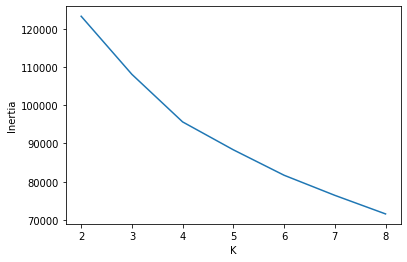

In [25]:
K=[2,3,4,5,6,7,8]
inertia=[KMeans(n_clusters=i).fit(k_search).inertia_ for i in K]
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

hasil dari elbow method hasil yang paling OK menunjukkan pada angka 4

# Gaussian Mixture

In [81]:
gm=GaussianMixture(n_components=4,covariance_type='tied').fit(gau)

In [82]:
gm.means_

array([[ 1.67751118e+00,  1.11448843e-01, -1.29343899e-01,
        -2.95026832e-02, -2.51755704e-01,  4.52833842e+00,
        -7.02087700e-01, -3.37226670e-01, -5.70524378e-01,
         1.47969597e+00,  1.65342950e+00, -3.37545833e-01,
         1.37108214e+00,  2.00961933e+00,  4.37931249e-01,
        -2.74819448e-01, -2.99747116e-01],
       [ 1.08602997e-03, -2.60261399e-01, -3.43450089e-01,
        -2.29346268e-01, -3.90425996e-01,  2.54311152e-02,
        -8.81392829e-01, -4.33916730e-01, -7.60275904e-01,
         1.92595574e-01,  1.06142064e-01, -4.91723966e-01,
        -1.56145019e-01, -1.55664657e-01, -2.12603428e-02,
        -2.53166103e-01, -1.49370378e-02],
       [-1.26024655e-01,  2.54312847e-01,  1.95912619e-01,
         1.07689185e-01,  2.65119847e-01, -2.29338299e-01,
         9.25278480e-01,  4.13884432e-01,  7.86896994e-01,
        -2.61922223e-01, -1.85377900e-01,  3.44296384e-01,
         4.37772529e-02, -3.42551975e-02, -3.31105236e-02,
         2.66396353e-01,  1.6

In [83]:
labels=gm.predict(gau)
labels

array([1, 0, 2, ..., 2, 1, 2], dtype=int64)

In [84]:
gm.converged_

True

In [85]:
gm.n_iter_

20

In [86]:
full_preds1 = gm.predict(df)

In [87]:
data_clustered1 = df.copy()
data_clustered1['Cluster'] = full_preds1 + 1
data_clustered1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,2
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [88]:
data_clustered1['Cluster'].value_counts()

2    4597
1    3713
3     259
4      67
Name: Cluster, dtype: int64

# DBSCAN

In [30]:
dbscan = DBSCAN(eps=2,min_samples=6)
dbscan.fit(db)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

untuk epsilon diisi 2 dan min sample 6

In [90]:
y_dbscan_pred = dbscan.labels_
dbscan_df = pd.DataFrame(db,columns = df.columns)
dbscan_df['clusters'] = y_dbscan_pred

In [91]:
dbscan_df['clusters'].value_counts()

 0    8014
-1     622
Name: clusters, dtype: int64

pada DBSCAN tidak bisa menentukan cluster berapa yang diinginkan, tidak cocok untuk labeling data

clustering yang dihasilkan ada 2 kelompok yang berarti -1 adalah outliers

# Model Inference

In [33]:
X_new = np.array([[155, 0.7, 162, 828, 797, 0, 0.75, 0.75, 0.16, 0, 0, 17, 1300, 1924, 123, 0.57, 12]])
km.predict(X_new)

array([3])

# Pengambilan Kesimpulan

Model Analysis
- Model dilakukan dengan 3 model yaitu KMeans, GaussianMixtures dan DBSCAN, pada model KMeans cluster yang dipilih sebanyak 4 cluster untuk dijadikan label dan pada evaluasi metrics elbow method, patahan yang paling besar jaraknya antara cluster lain ialah k=4, untuk GaussainMixtures cluster yang dipilih juga sama ialah 4 cluster sedangkan dengan DBSCAN didapatkan 2 cluster

Overal Analysis
- KMeans dan GaussianMixtures sangat berguna untuk membentuk sebuah label sedangkan DBSCAN berguna untuk mendeteksi outlier
- pada pengclusteran yang dilakukan pada GaussianMixtures :
saya mendapatkan kesimpulan bahwa 9000 pemegang kartu ini dapat dicluster menjadi 4 cluster yaitu :
- Pemegang kartu platinum
- Pemegang kartu gold
- Pemegang kartu silver
- Pemegang kartu bronze

untuk meningkatkan strategi pemasaran pada 9000 pemegang kartu ini adalah bisa dilihat dari bagaimana karakteristik nya, untuk platinum berikan bunga yang rendah agar dapat menggunakan kredit nya ketimbang dengan tunai, untuk gold berikan perhatian khusus pada pemegang kartu ini, karena sesuai dengan karakteristik nya yang suka melakukan pembelian dengan mencicil, dapat dilakukan dengan menaikkan limit kredit nya, untuk silver dan bronze dapat dilakukan dengan strategi menambah lebih besar besaran saldo saat diperbaharui.

# EDA Clustering

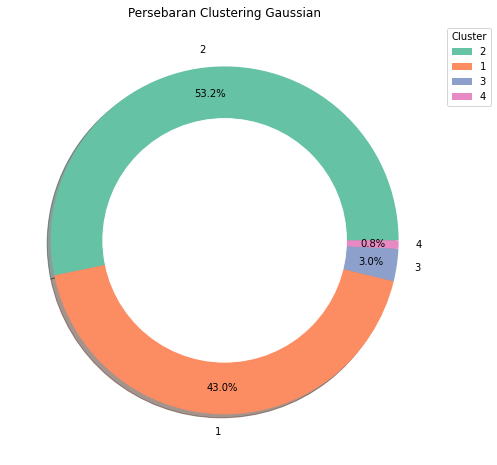

In [98]:
PALETTE = sns.color_palette("Set2")
sizes = dict(data_clustered1['Cluster'].value_counts())

plt.figure(figsize=(12, 8))
plt.title('Persebaran Clustering Gaussian')
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Cluster", labels=sizes.keys(), bbox_to_anchor=(1, 1))


my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Melihat karakteristik cluster 1 gaussian mixtures

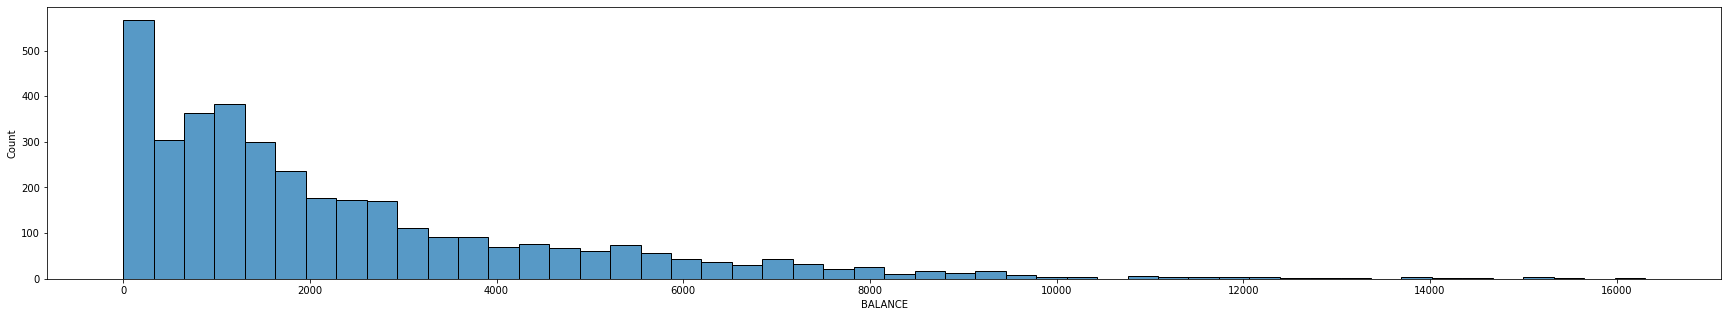

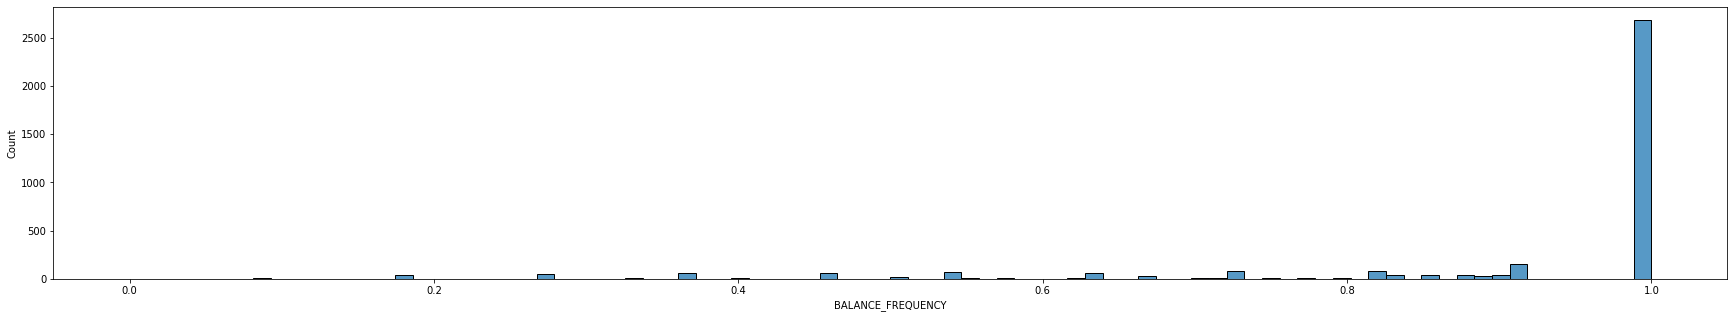

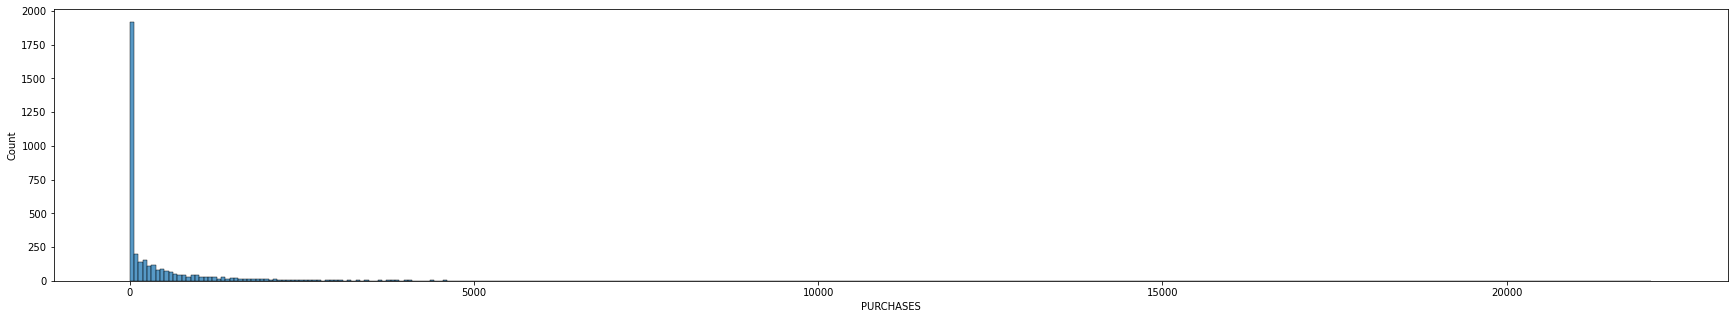

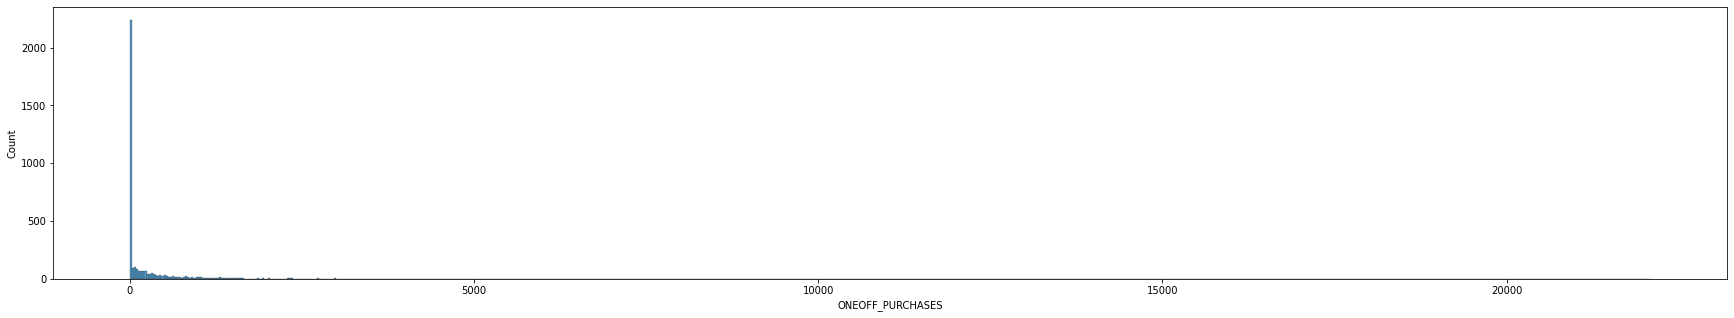

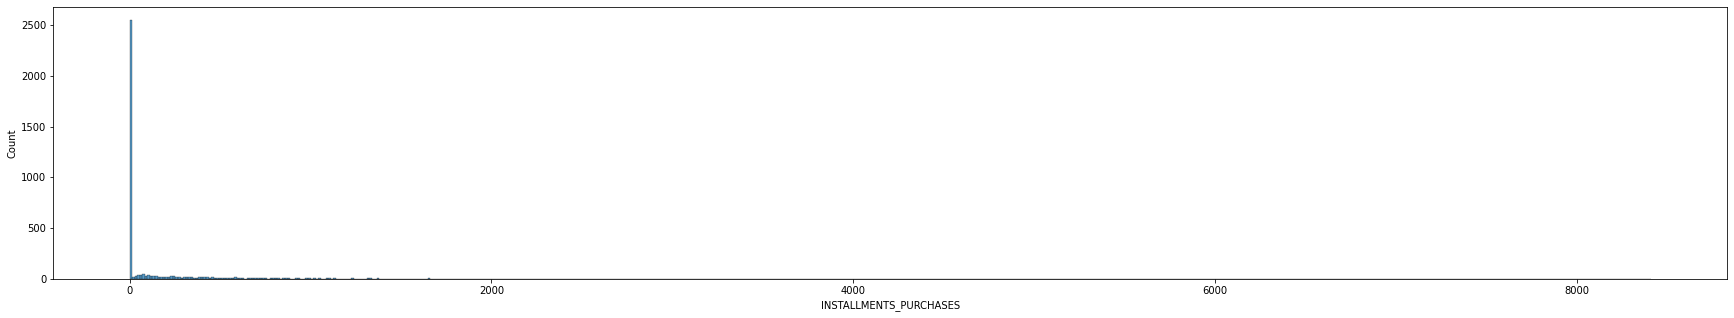

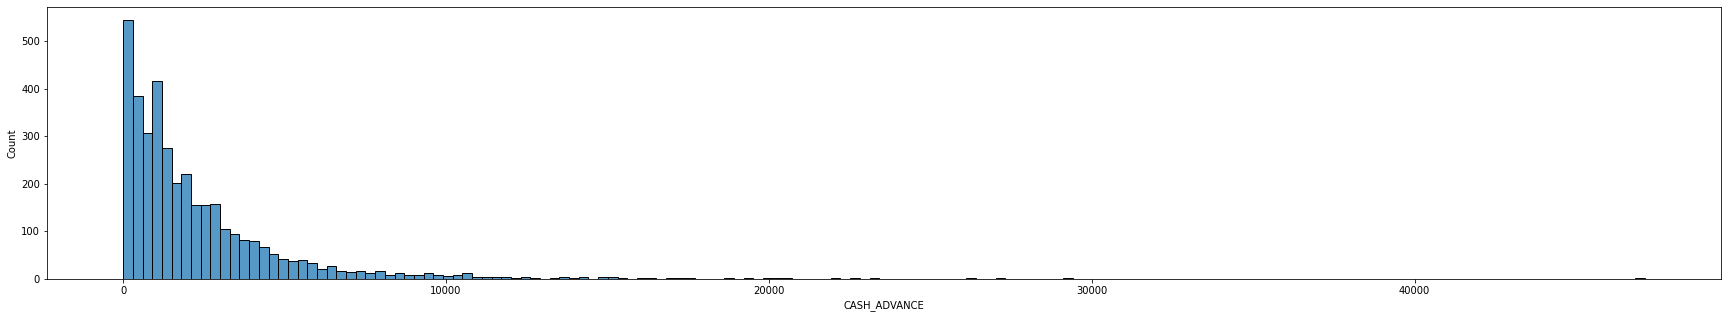

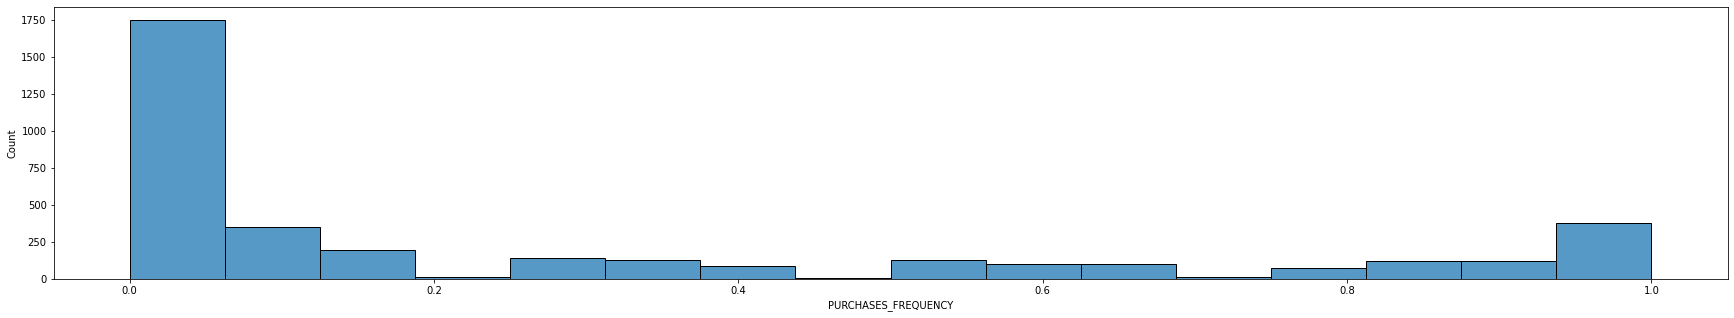

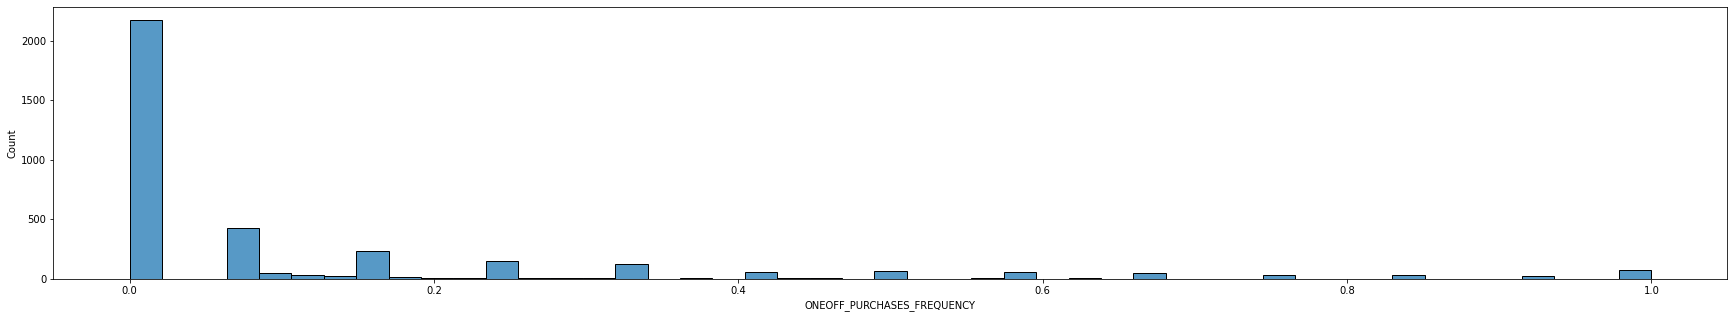

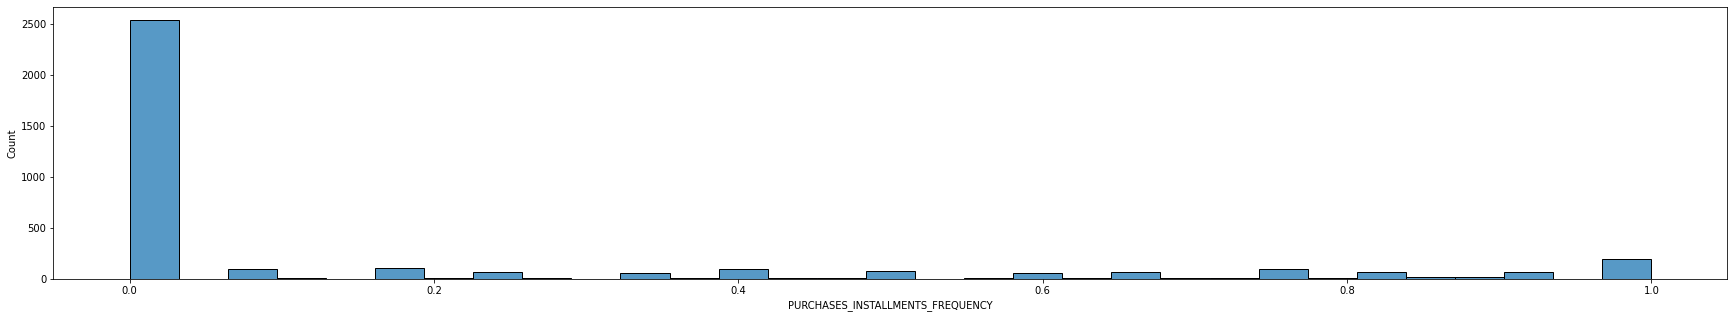

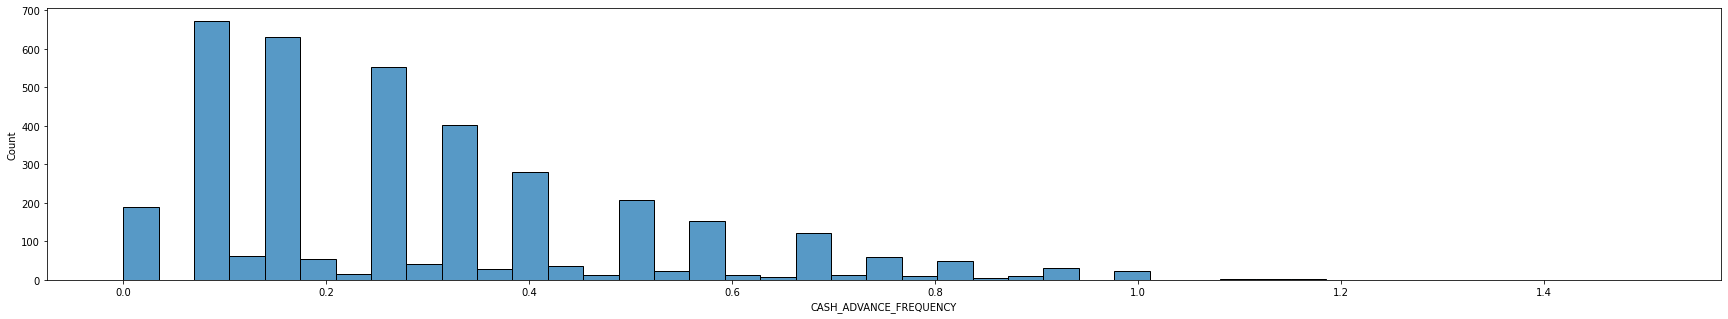

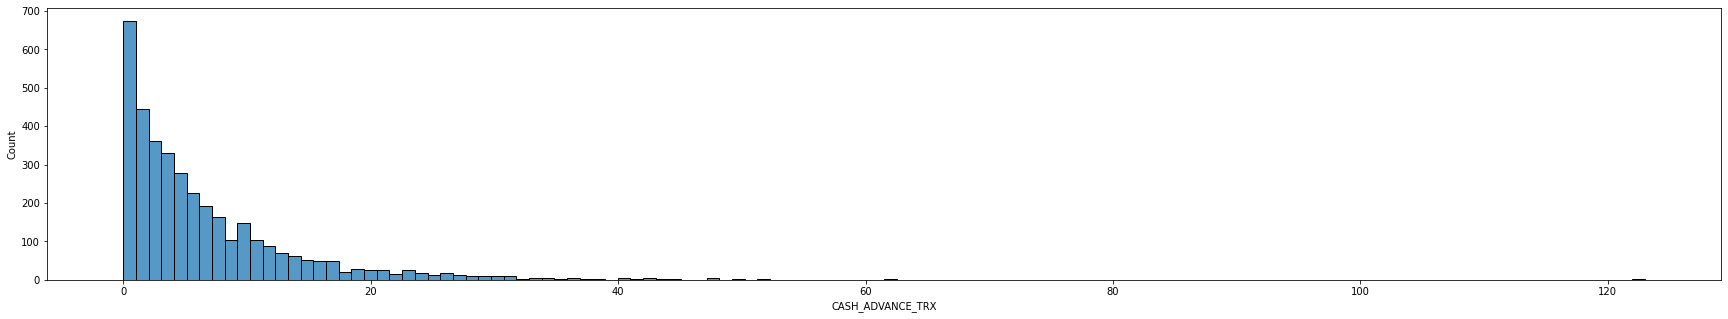

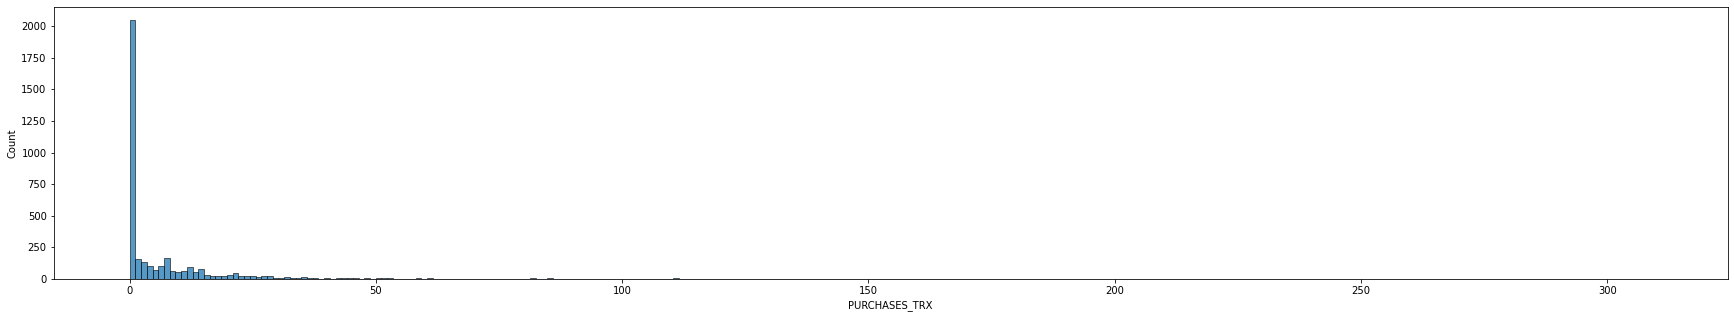

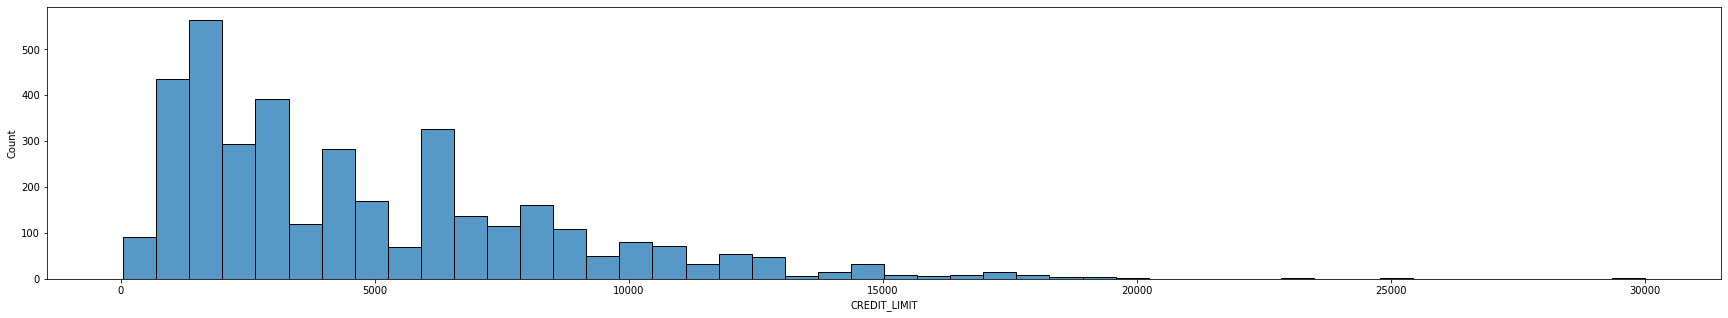

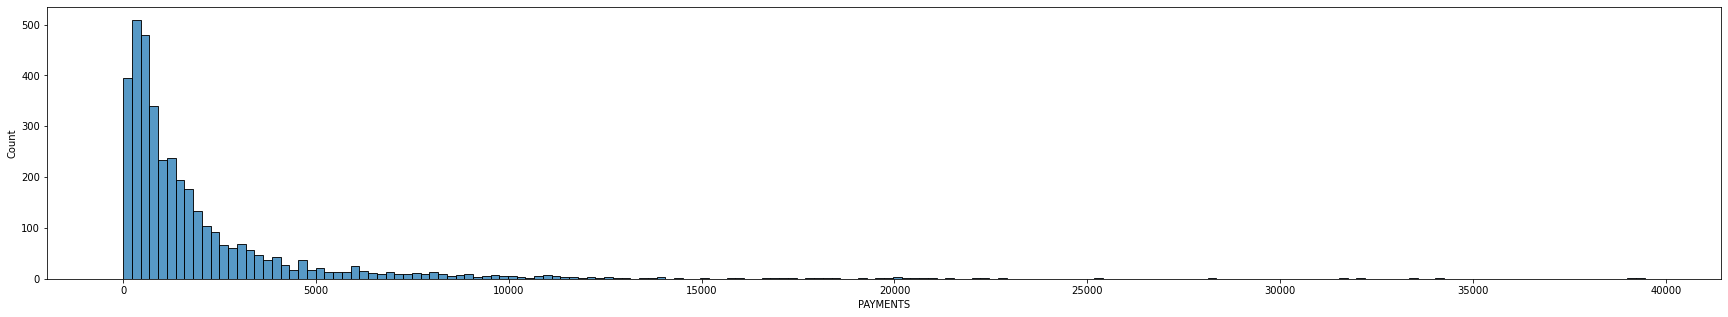

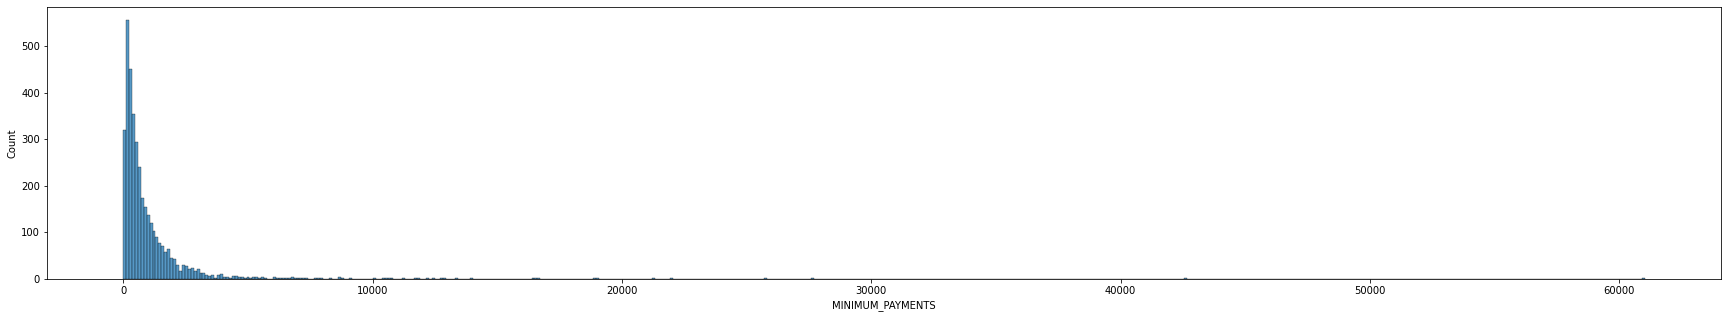

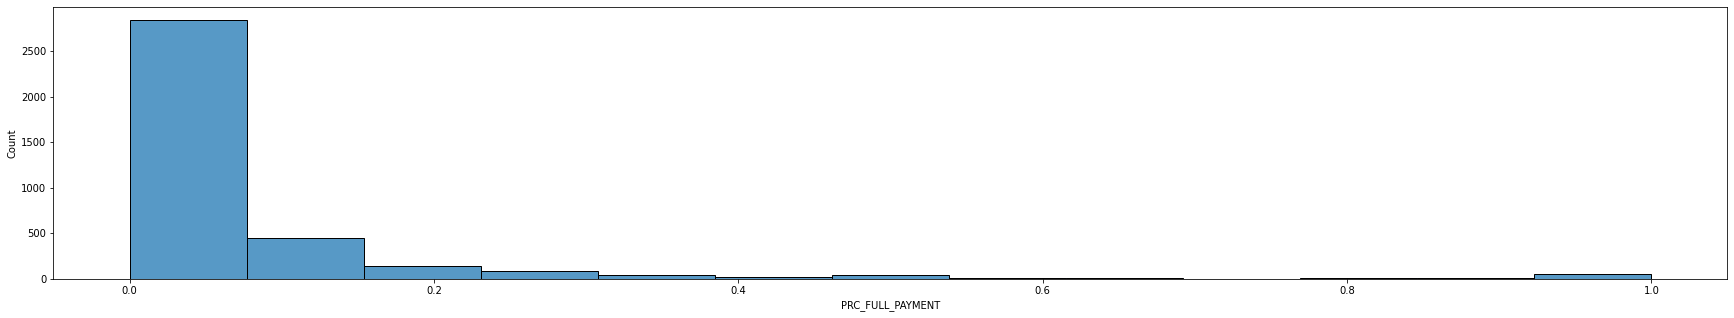

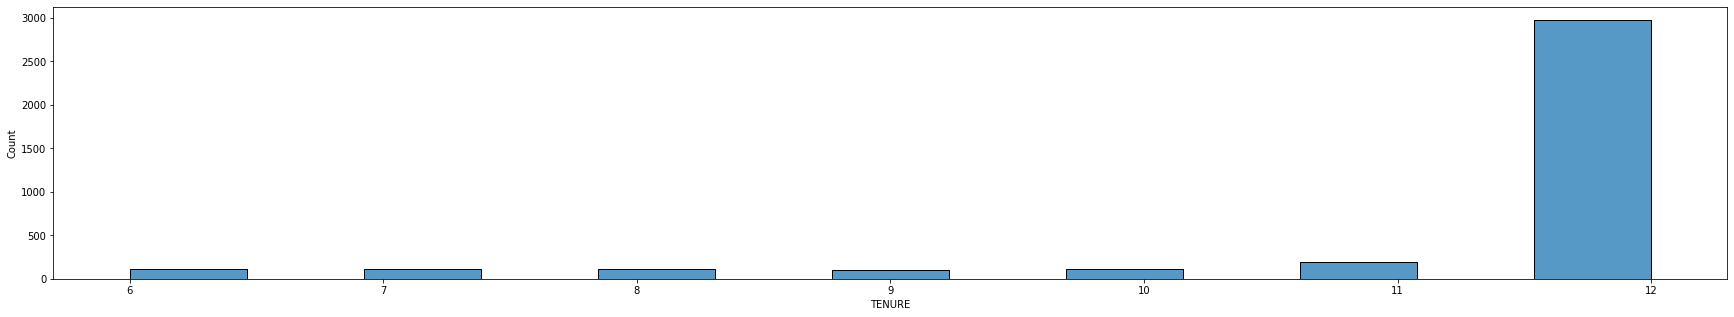

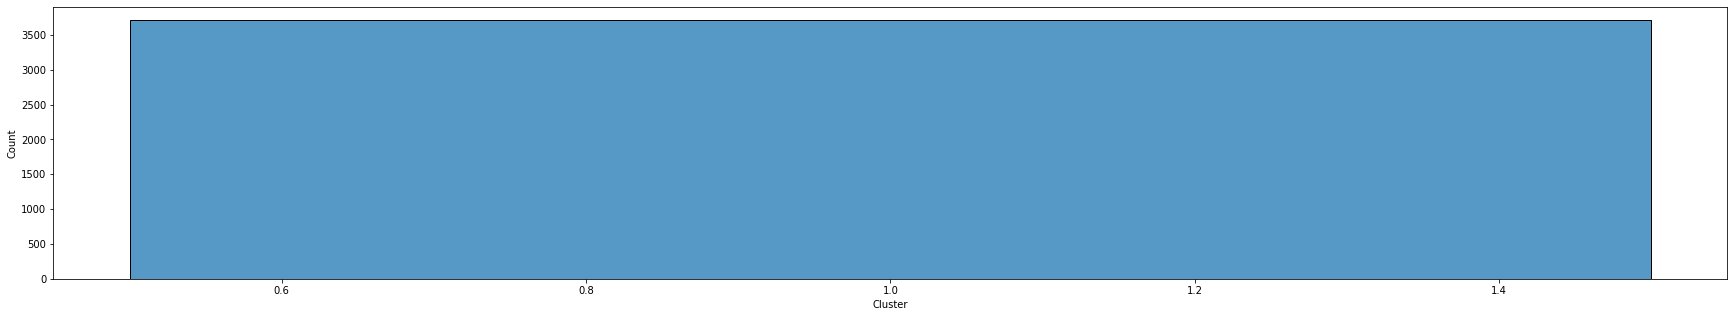

In [112]:
cluster1_gau = data_clustered1[
    (data_clustered1['Cluster'] == 1)
]
for column in cluster1_gau.columns:
    plt.figure(figsize = (30,5))
    sns.histplot(cluster1_gau[column])
    plt.show()

Karakteristik cluster 1 :
- Balance/Saldo : Sebagian pemegang kartu mempunyai saldo hingga 8.000
- Balance Frekuensi/Saldo sering diperbaharui : Saldo pemegang kartu sangat sering diperbaharui hingga tidak pernah tidak perbaharui
- Purchases/Pembelian : pemegang kartu hampir tidak pernah melakukan pembelian
- ONEOFPURCHASES/Pembelian sekali jalan :pemegang kartu tidak pernah melakukan pembelian sekali jalan
- INSTALLMENTPURCHASES/Pembelian dengan mencicil : pemegang kartu sangat sedikit melakukan pembelian dengan mencicil
- CASHADVANCE/Tunai : pemegang kartu banyak melakukan dengan tunai dengan total 10.000
- CREDITLIMIT/Limit kartu kredit : pemegang kartu mempunyai limit kartu kredit hingga besaran 15.000
- PAYMENTS/Pembayaran : pemegang kartu melakukan pembayaran hingga besaran 10.000
- TENURE/Jangka waktu layanan kartu kredit : pemegang kartu memanfaatkan jangka waktu yang lama hingga 12 bulan

Saya mengasumsikan cluster 1 ini dengan kelompok platinum, karena melakukan pembayaran yang besar walaupun mereka sering menggunakan tunai

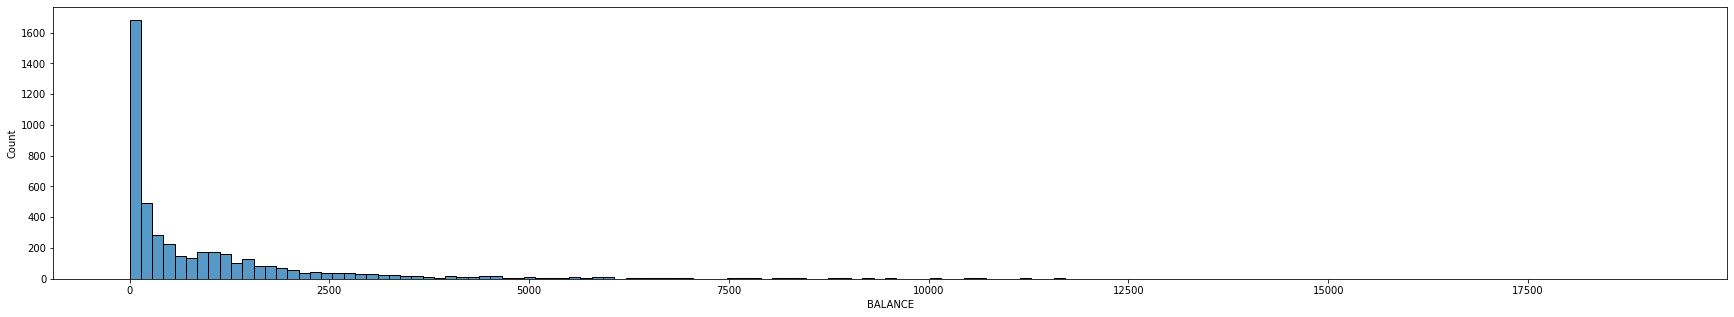

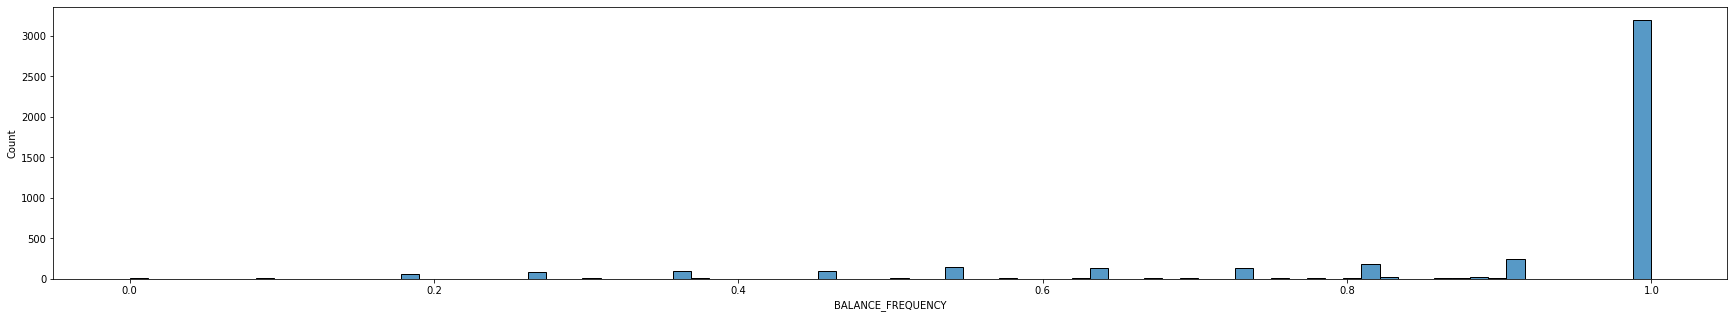

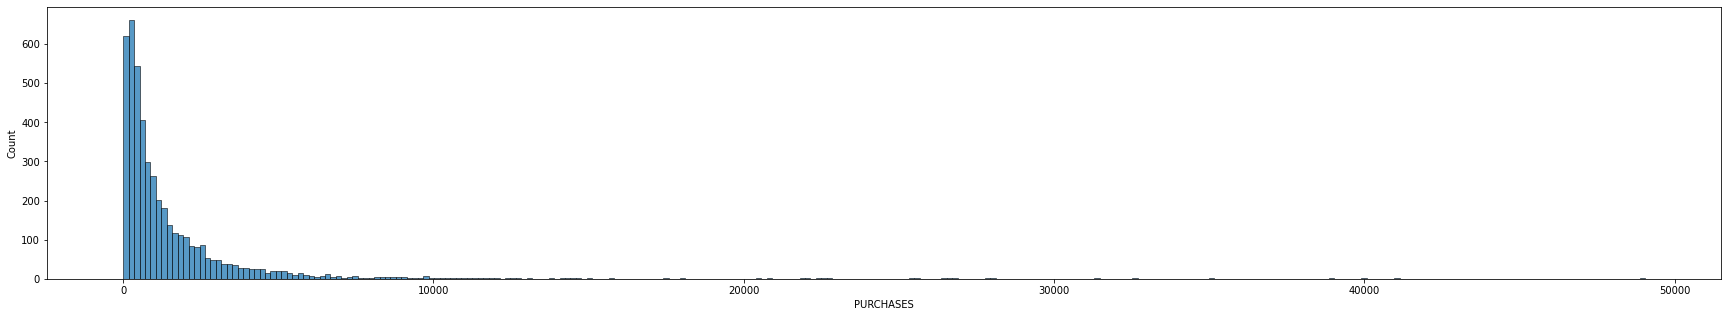

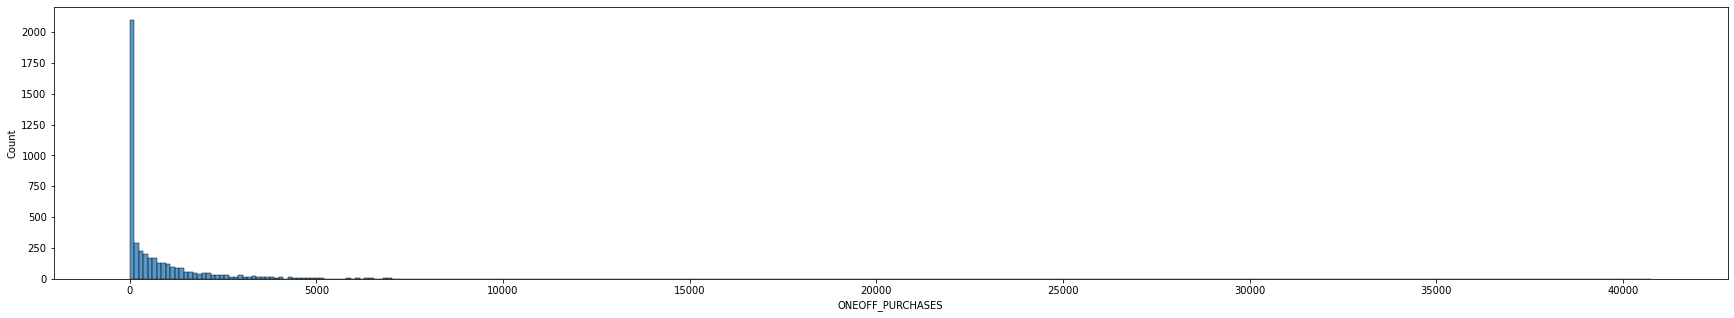

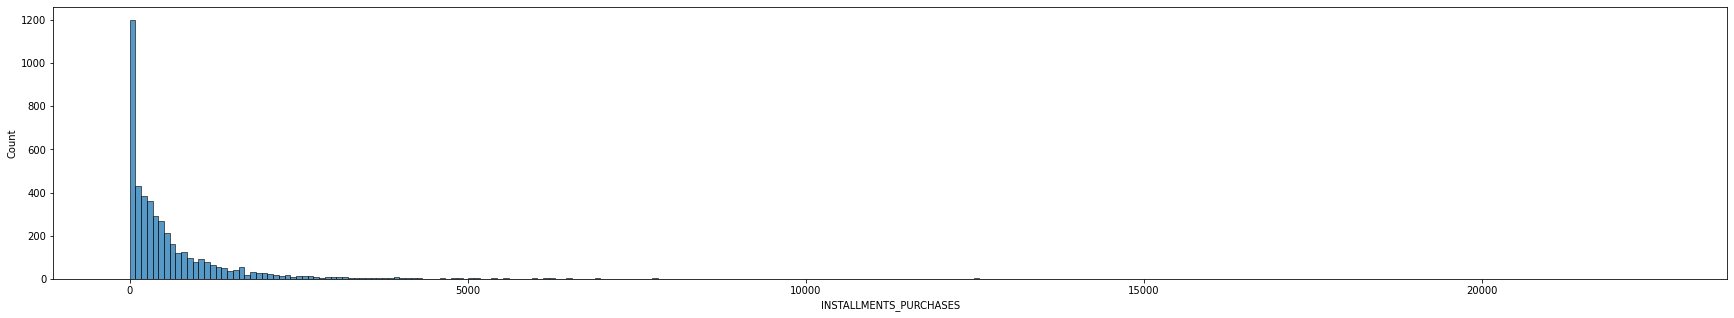

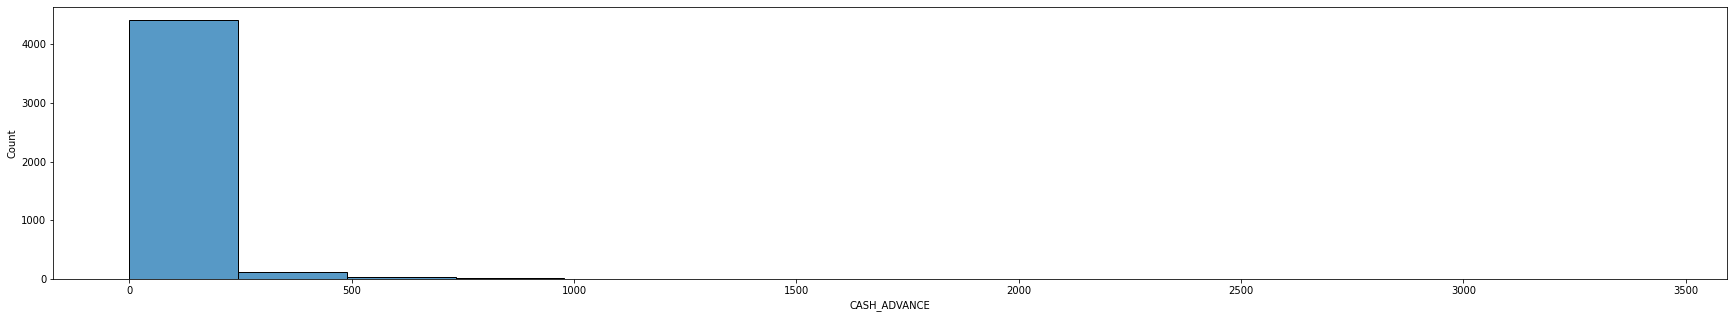

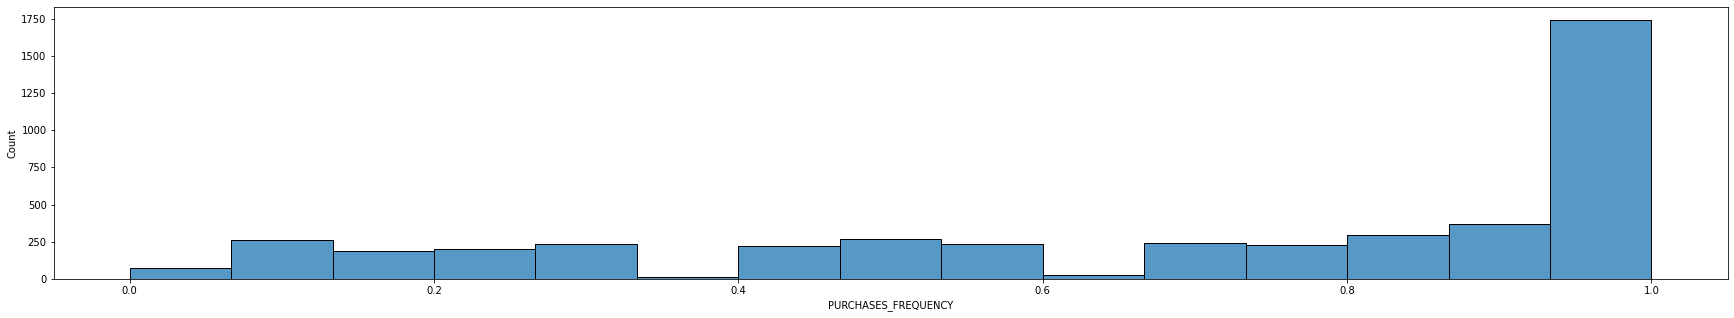

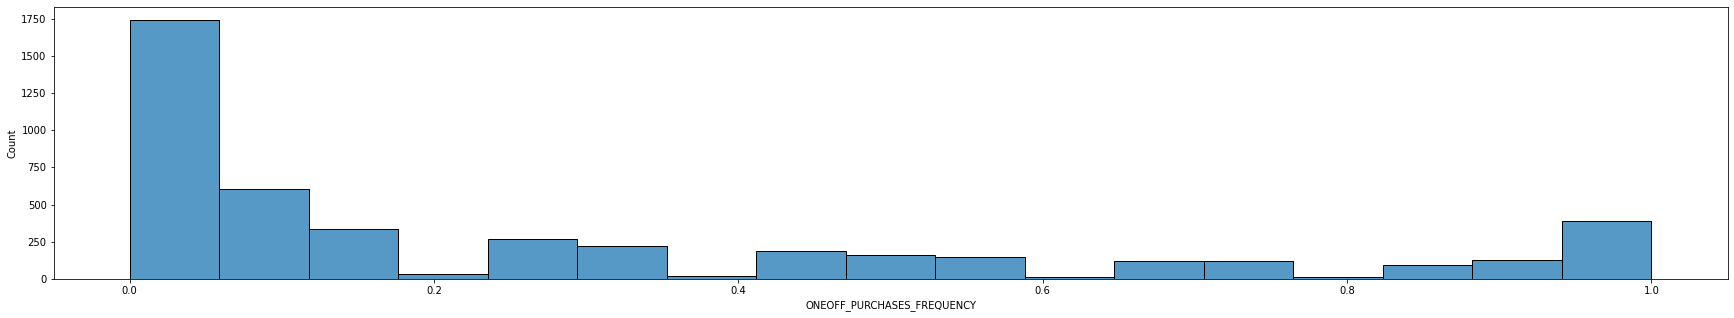

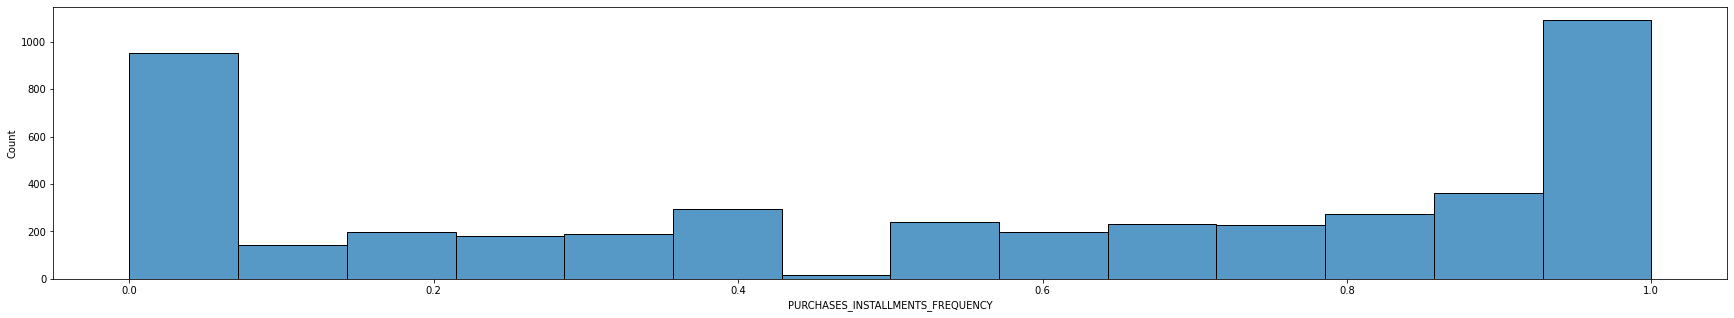

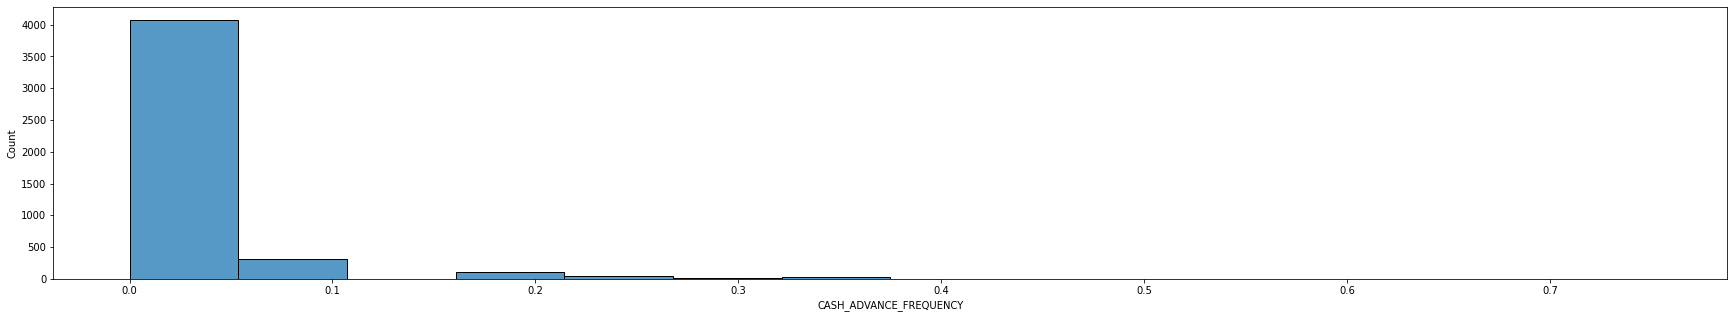

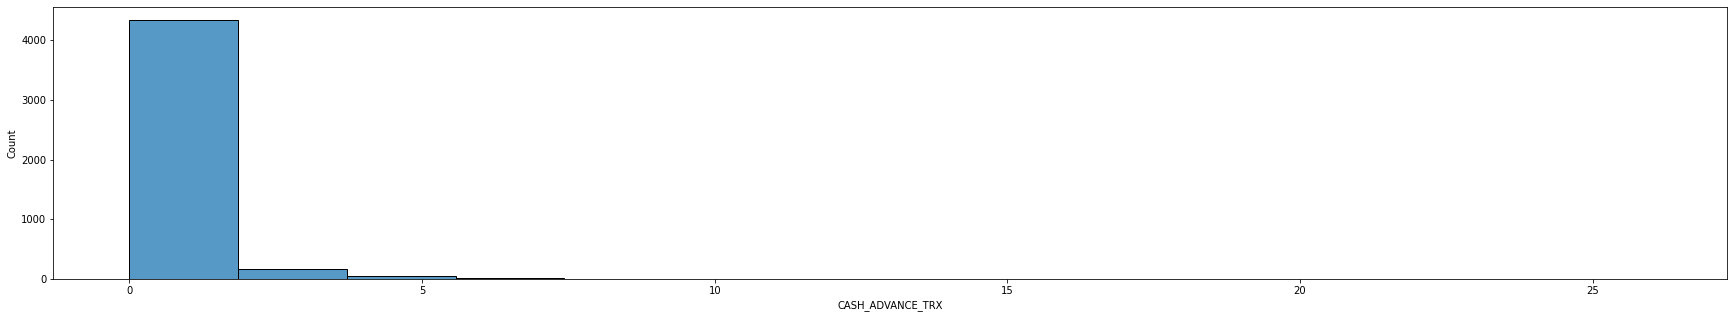

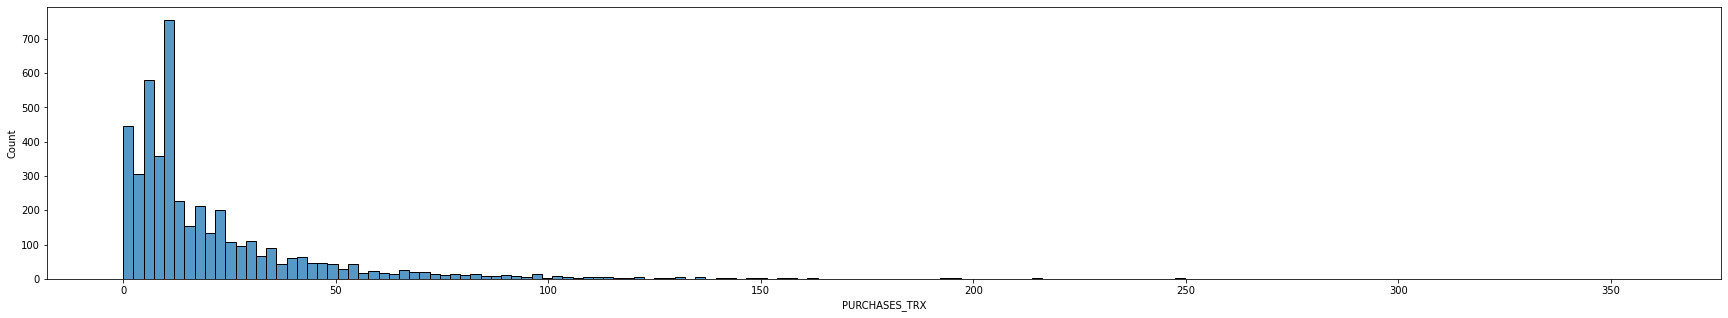

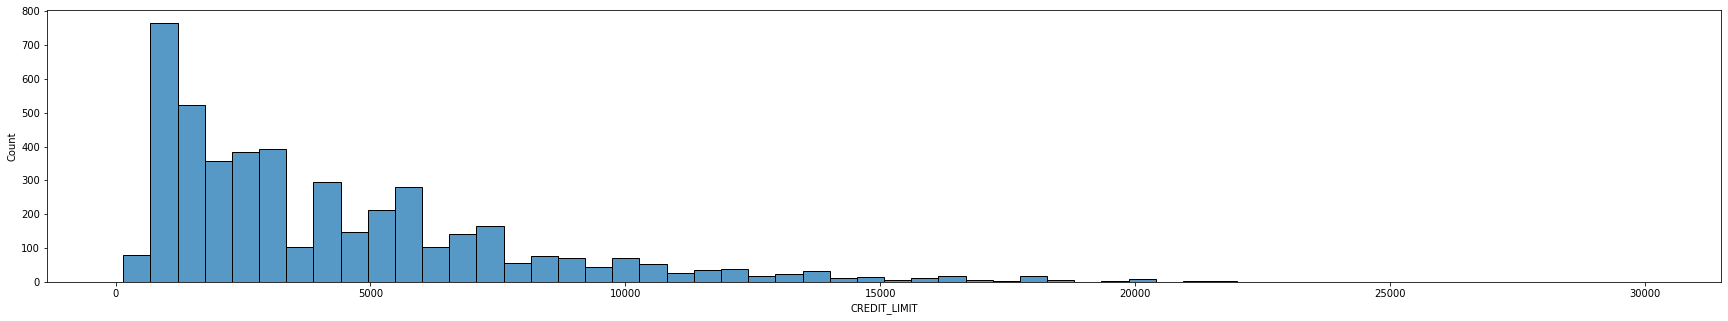

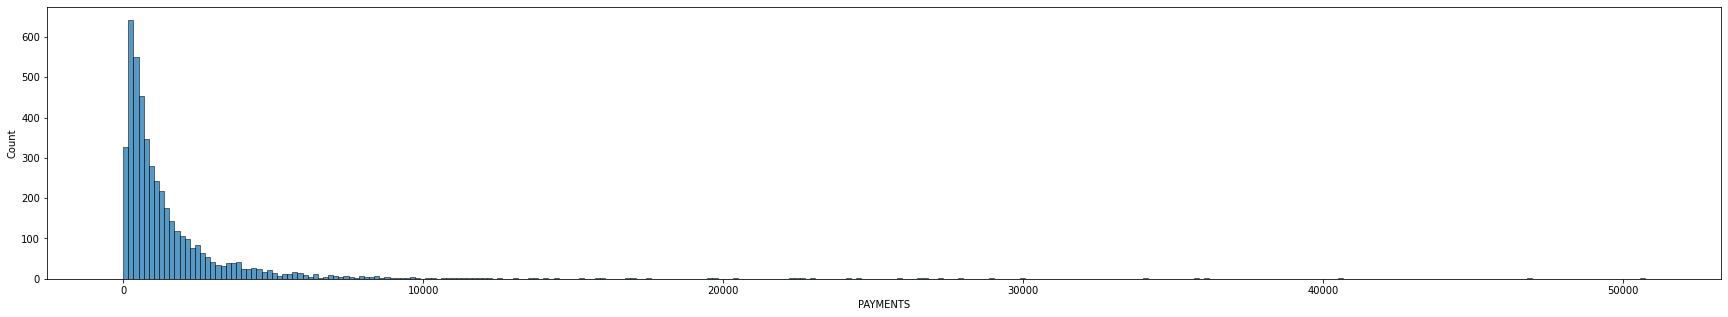

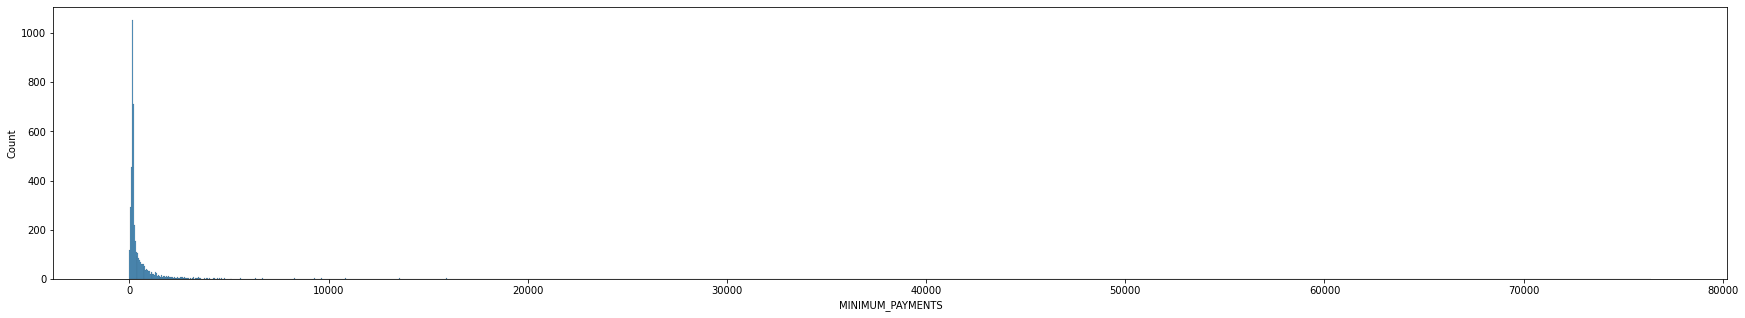

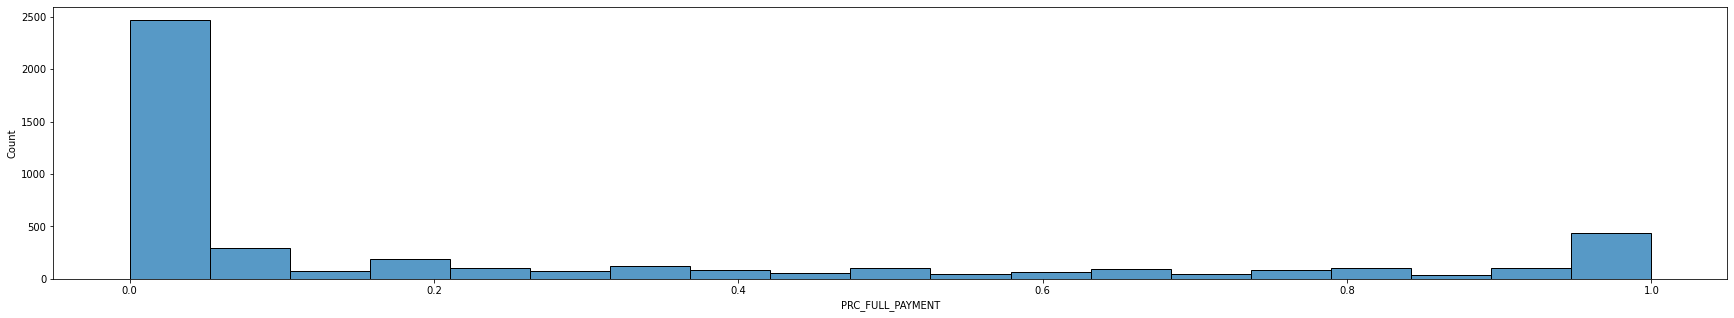

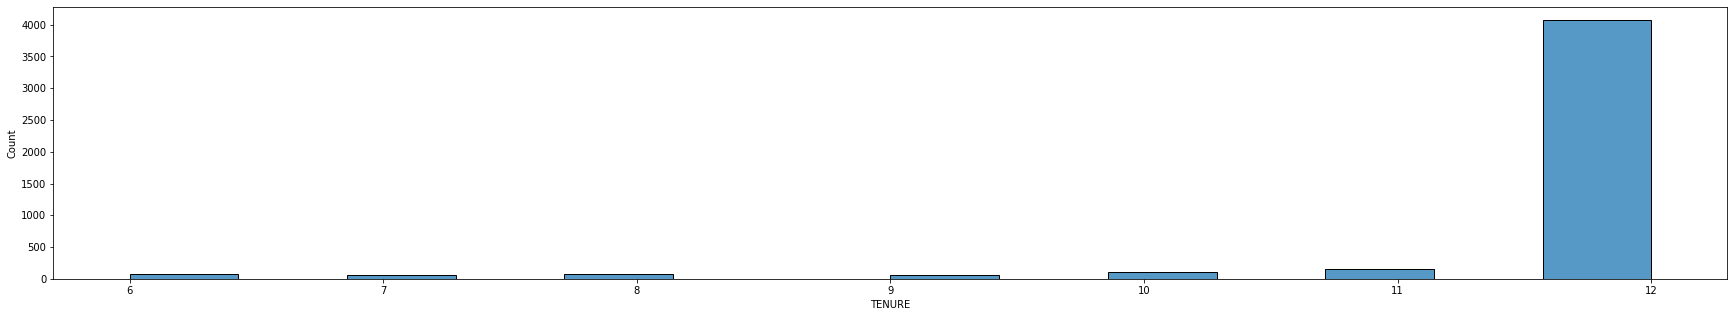

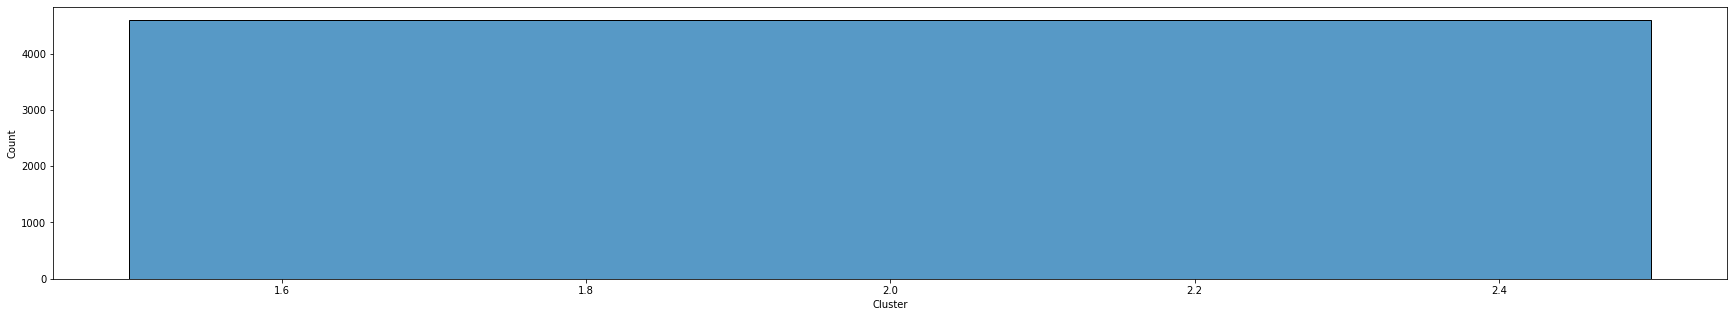

In [113]:
cluster2_gau = data_clustered1[
    (data_clustered1['Cluster'] == 2)
]
for column in cluster2_gau.columns:
    plt.figure(figsize = (30,5))
    sns.histplot(cluster2_gau[column])
    plt.show()

Karakteristik cluster 2 :
- Balance/Saldo : Sebagian pemegang kartu mempunyai saldo hingga 2.500
- Balance Frekuensi/Saldo sering diperbaharui : Saldo pemegang kartu sering diperbaharui
- Purchases/Pembelian : pemegang kartu sebagian melakukan pembeliaan hingga 5.000
- ONEOFPURCHASES/Pembelian sekali jalan :pemegang kartu sebagian melakukan pembelian sekali jalan hingga 2.500
- INSTALLMENTPURCHASES/Pembelian dengan mencicil : pemegang kartu melakukan pembelian dengan mencicil hingga 2.500
- CASHADVANCE/Tunai : pemegang kartu tidak melakukan dengan tunai
- CREDITLIMIT/Limit kartu kredit : pemegang kartu mempunyai limit kartu kredit hingga besaran 10.000
- PAYMENTS/Pembayaran : pemegang kartu melakukan pembayaran paling banyak dari 2.500 - 5.000
- TENURE/Jangka waktu layanan kartu kredit : pemegang kartu memanfaatkan jangka waktu yang lama hingga 12 bulan

Saya mengasumsikan cluster ini adalah katergori gold, karena suka melakukan pembelian dengan mencicil, sangat cocok untuk terus diberi kredit, dan termasuk royal dari perbandingan antara nilai saldo dan nilai beli

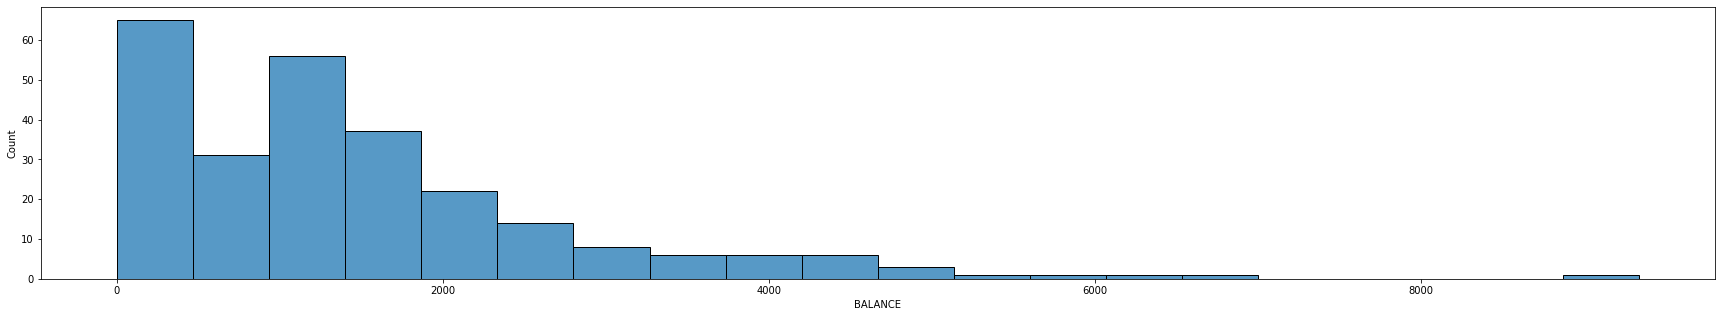

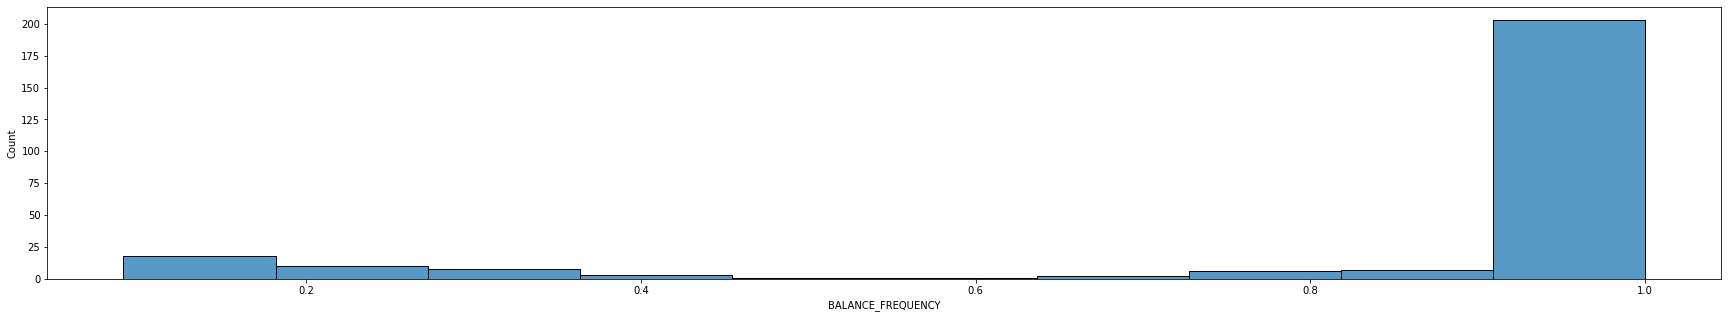

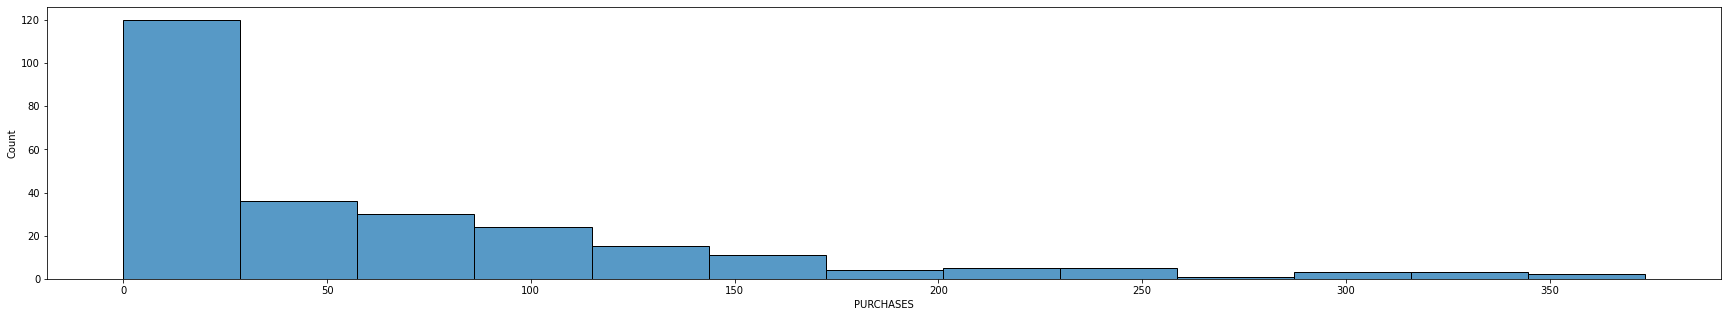

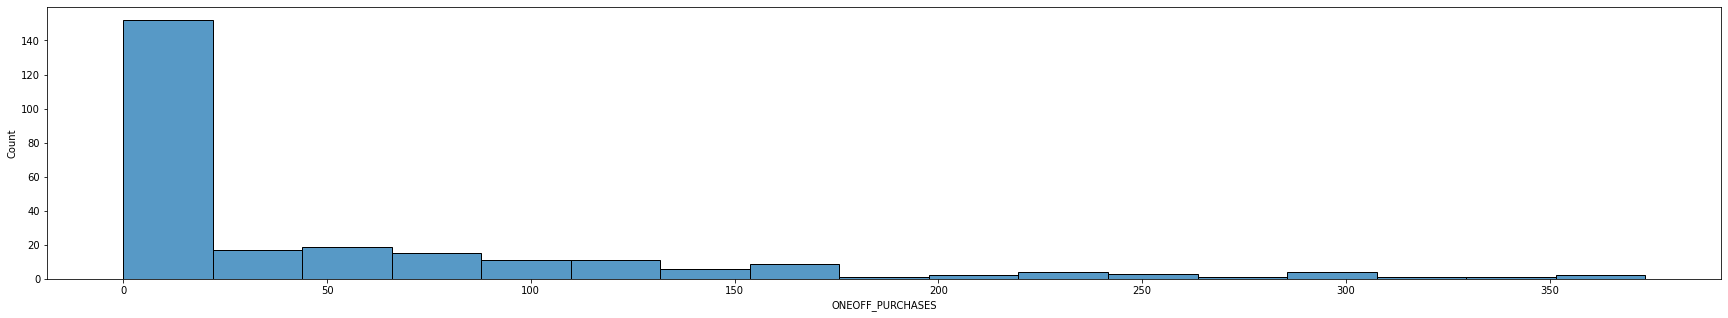

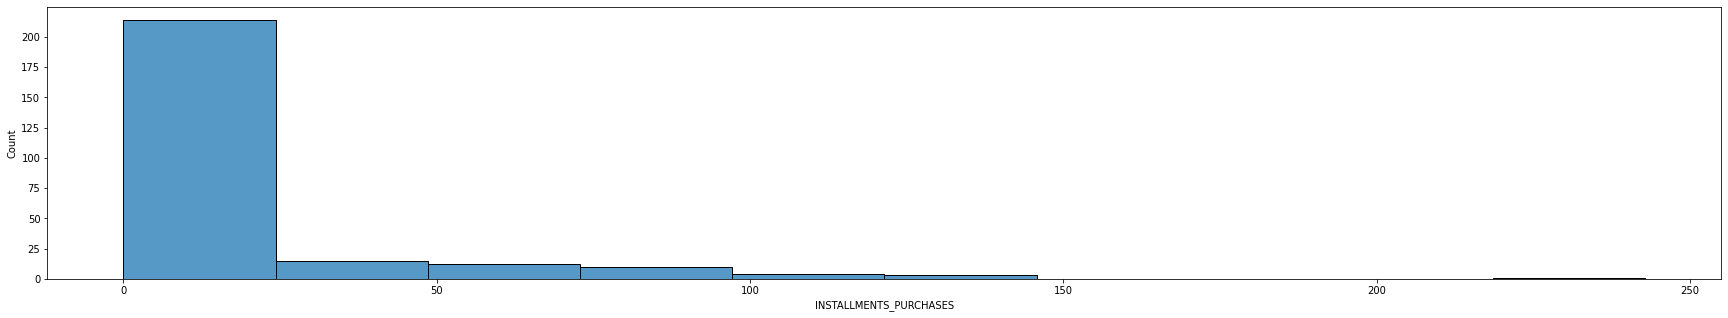

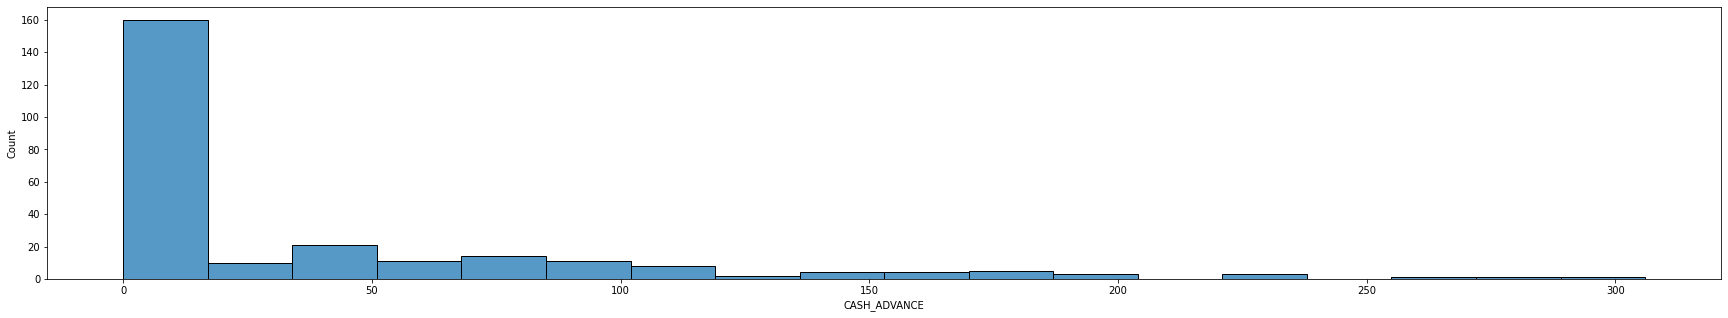

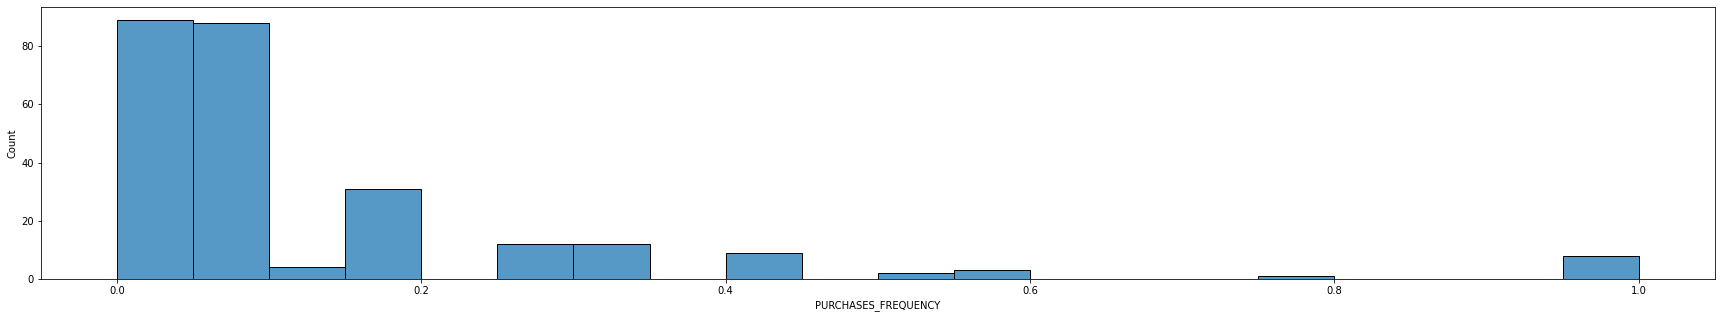

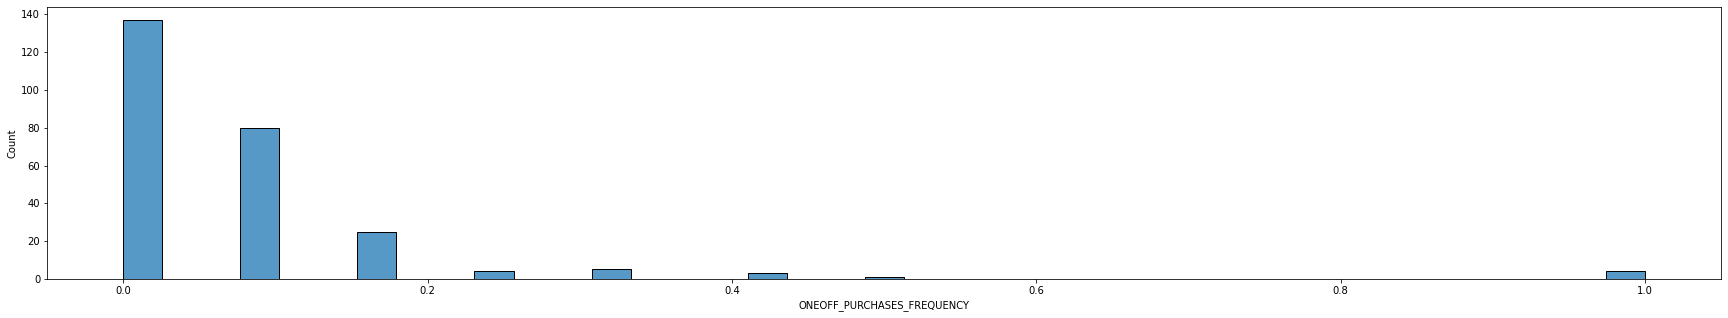

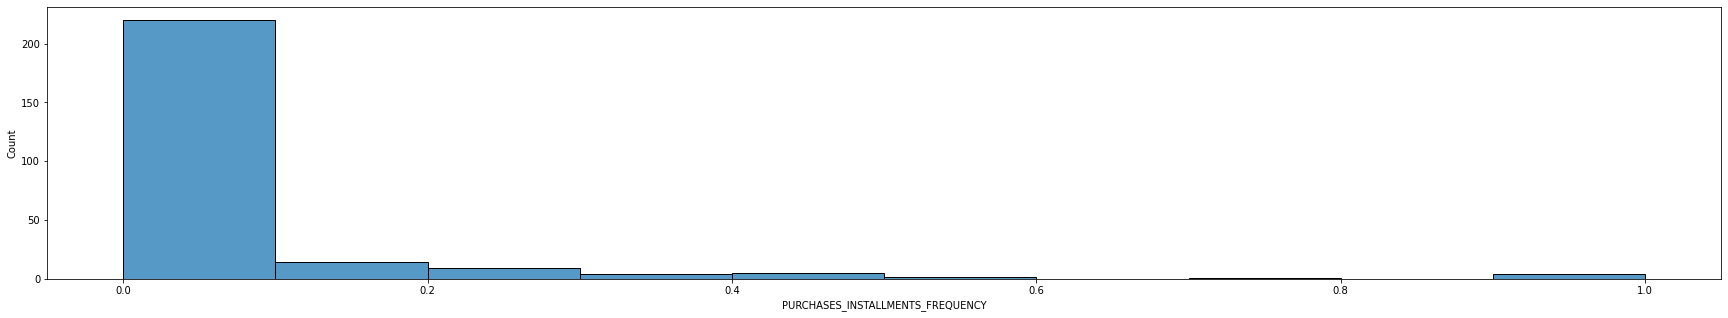

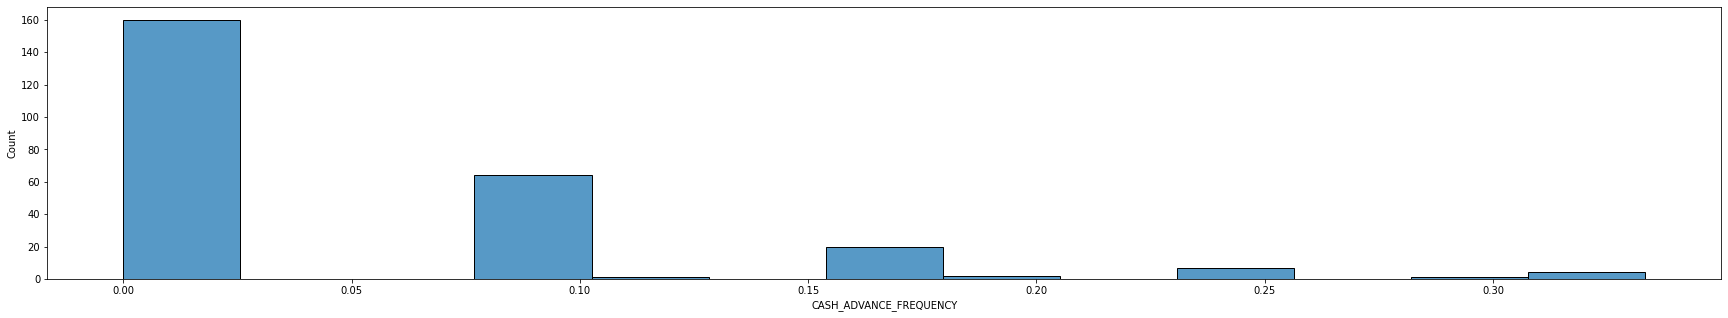

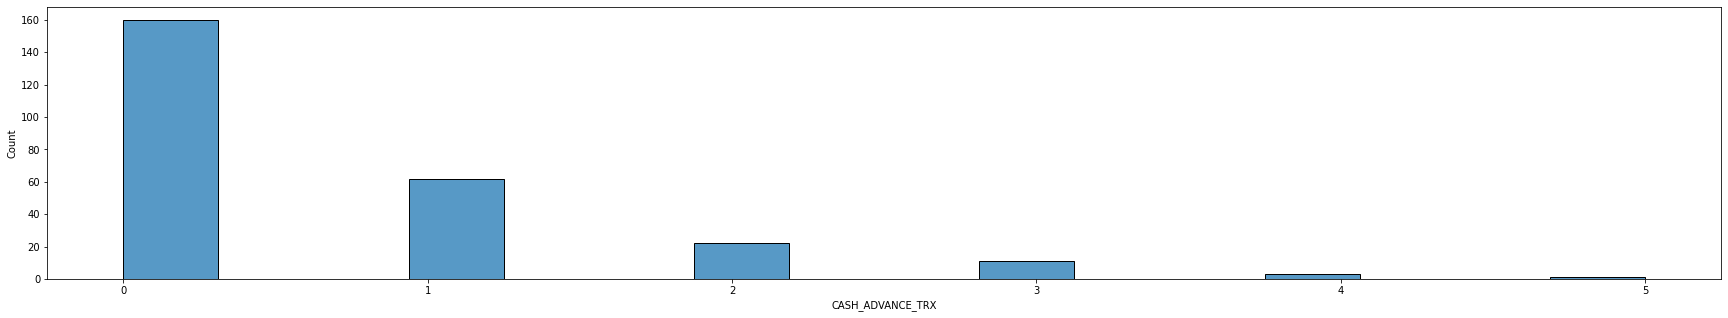

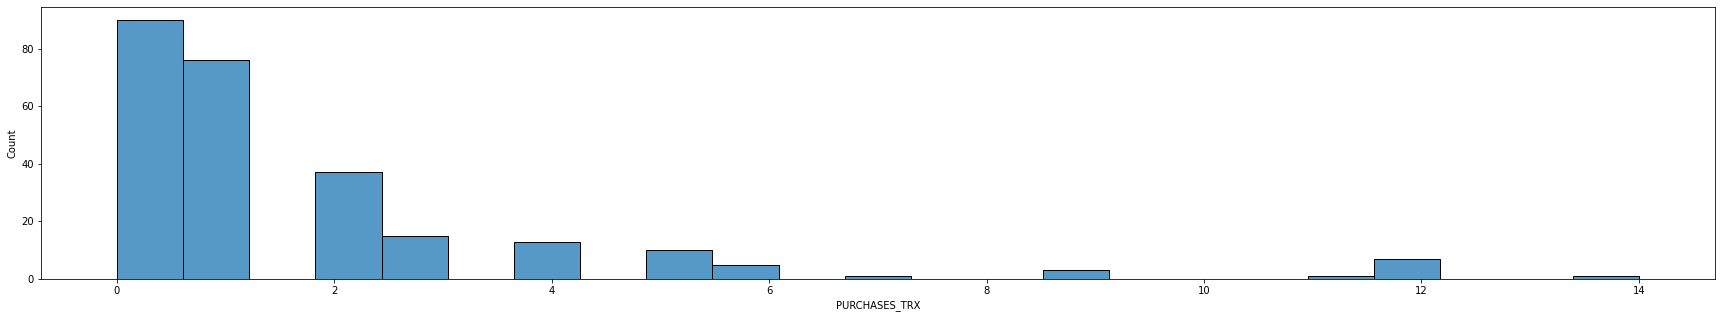

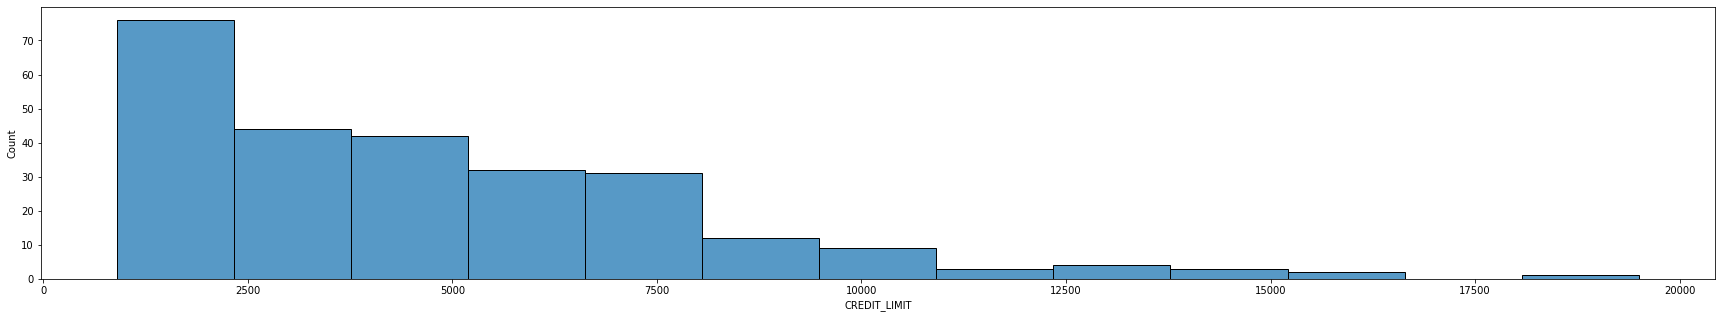

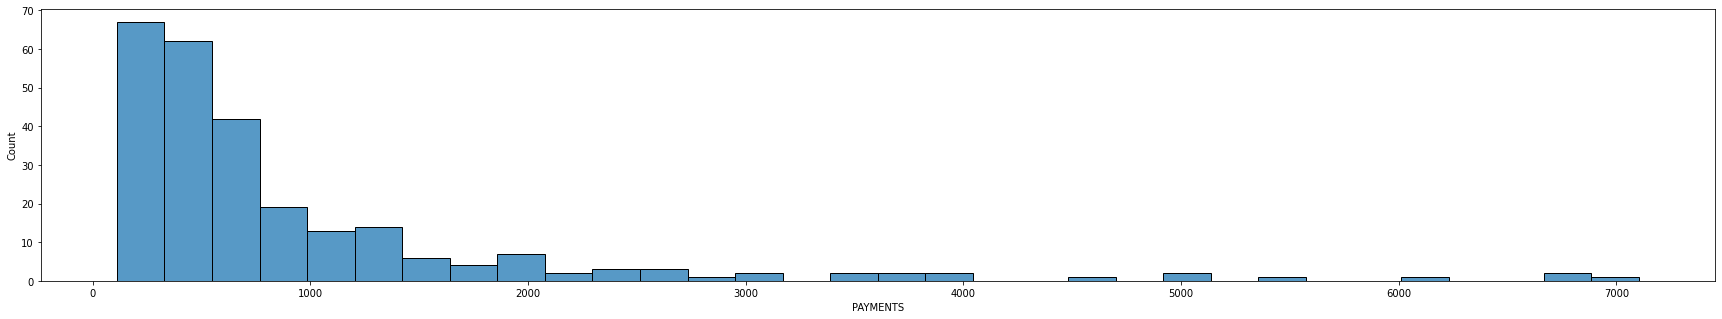

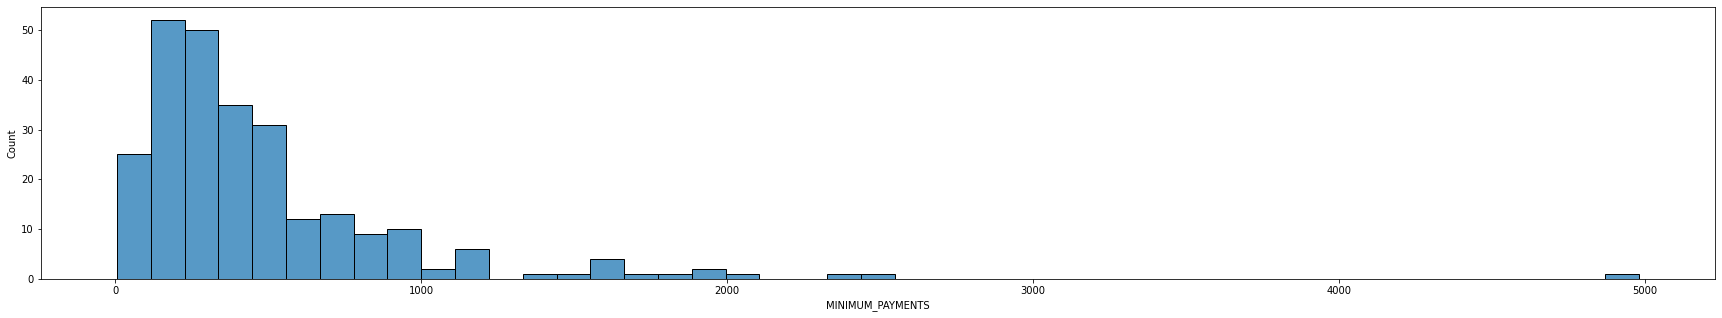

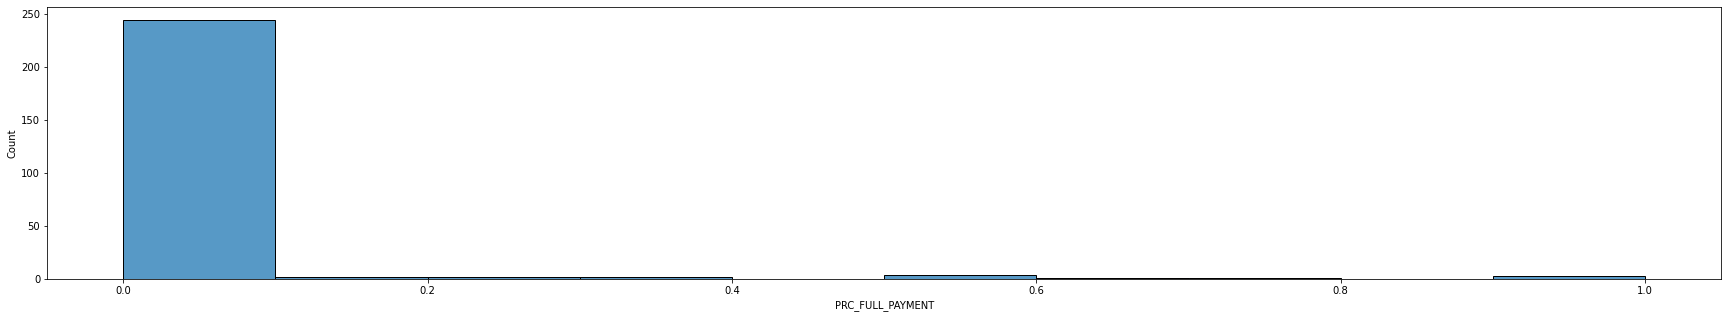

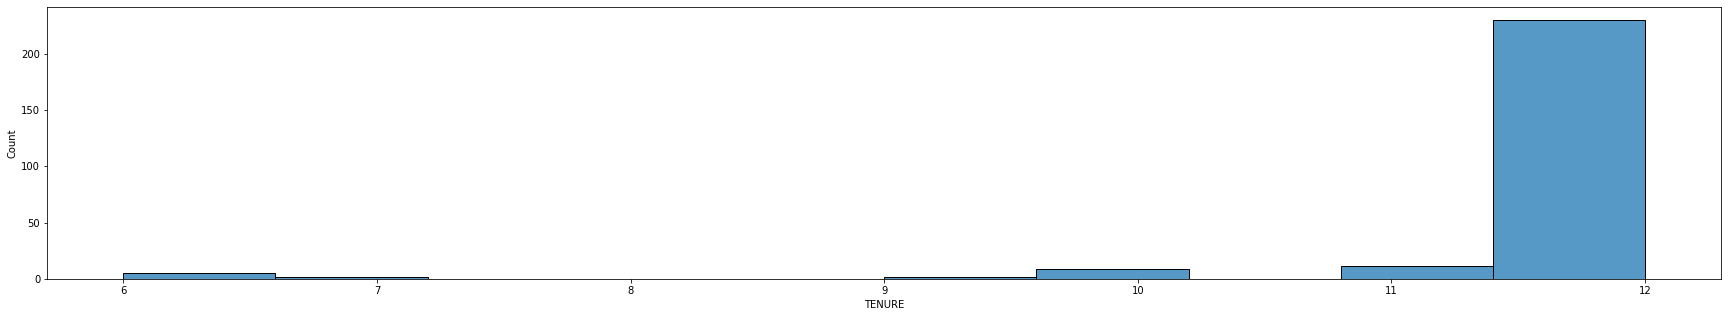

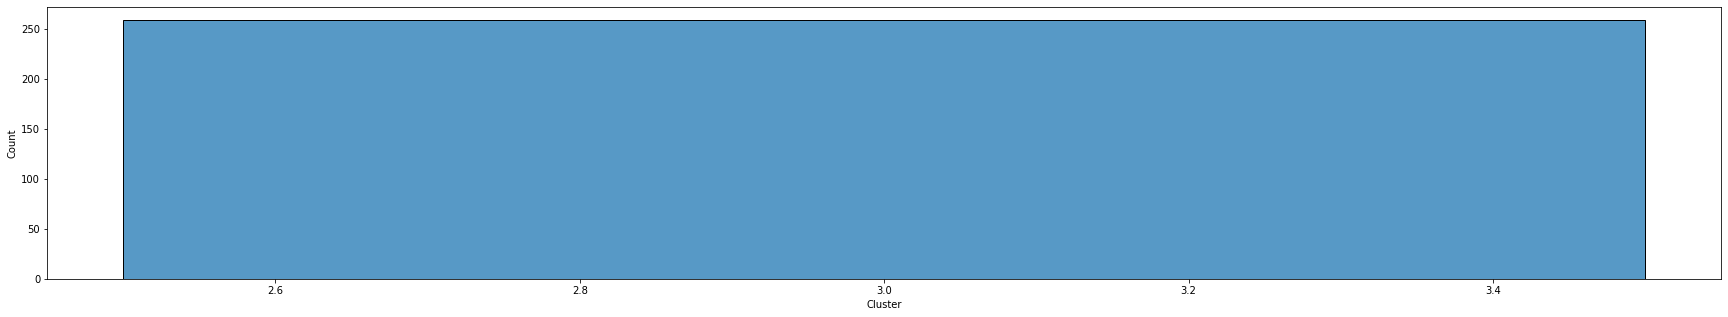

In [114]:
cluster3_gau = data_clustered1[
    (data_clustered1['Cluster'] == 3)
]
for column in cluster3_gau.columns:
    plt.figure(figsize = (30,5))
    sns.histplot(cluster3_gau[column])
    plt.show()

Karakteristik 3 :
- Balance/Saldo : Sedikit pemegang kartu mempunyai saldo hingga 2.000
- Balance Frekuensi/Saldo sering diperbaharui : Saldo pemegang kartu sering diperbaharui
- Purchases/Pembelian : pemegang kartu sebagian melakukan pembeliaan hanya 150
- ONEOFPURCHASES/Pembelian sekali jalan :pemegang kartu sebagian melakukan pembelian sekali jalan 150 dan banyak yang tidak membeli
- INSTALLMENTPURCHASES/Pembelian dengan mencicil : pemegang kartu melakukan pembelian dengan mencicil 150 dan banyak yang tidak membeli
- CASHADVANCE/Tunai : pemegang kartu tidak melakukan dengan tunai
- CREDITLIMIT/Limit kartu kredit : pemegang kartu mempunyai limit kartu kredit hingga besaran 10.000
- PAYMENTS/Pembayaran : pemegang kartu melakukan pembayaran paling banyak dari 1.000
- TENURE/Jangka waktu layanan kartu kredit : pemegang kartu memanfaatkan jangka waktu yang lama hingga 12 bulan

cluster 3 saya mengasumsikan kategori bronze, karena nilai beli yang sangat kecil dan hanya menggunakan saldo secukupnya dan tau bagaimana cara kerja kredit card

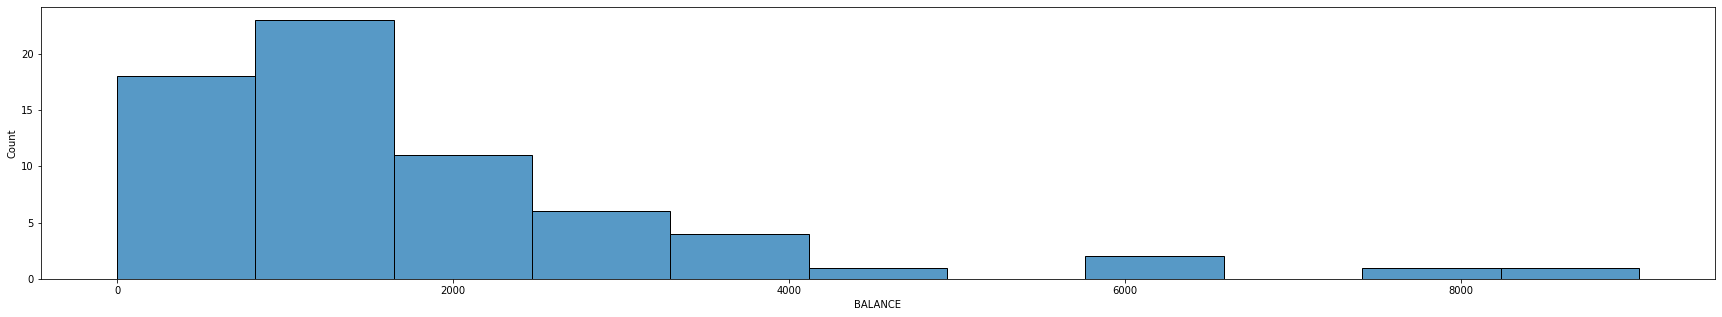

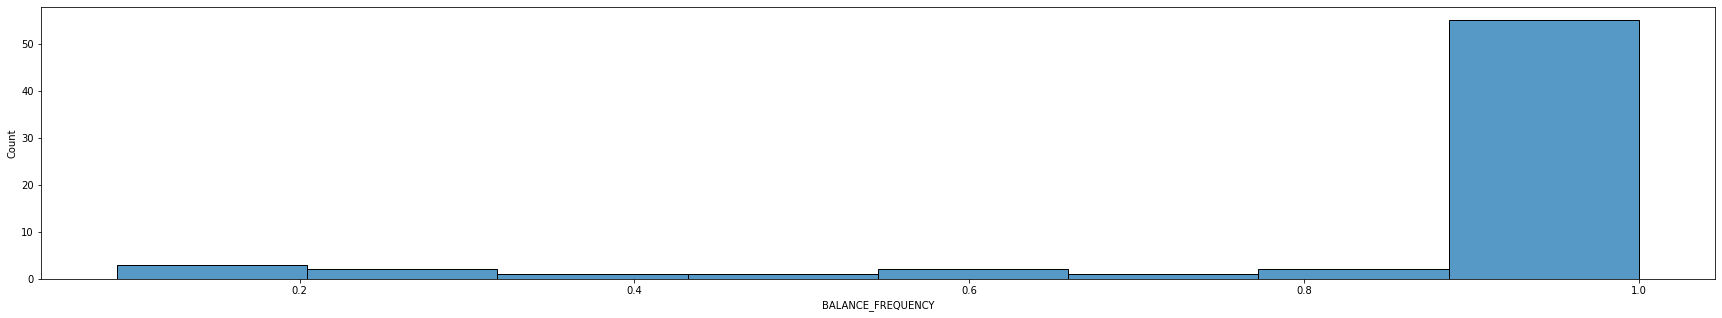

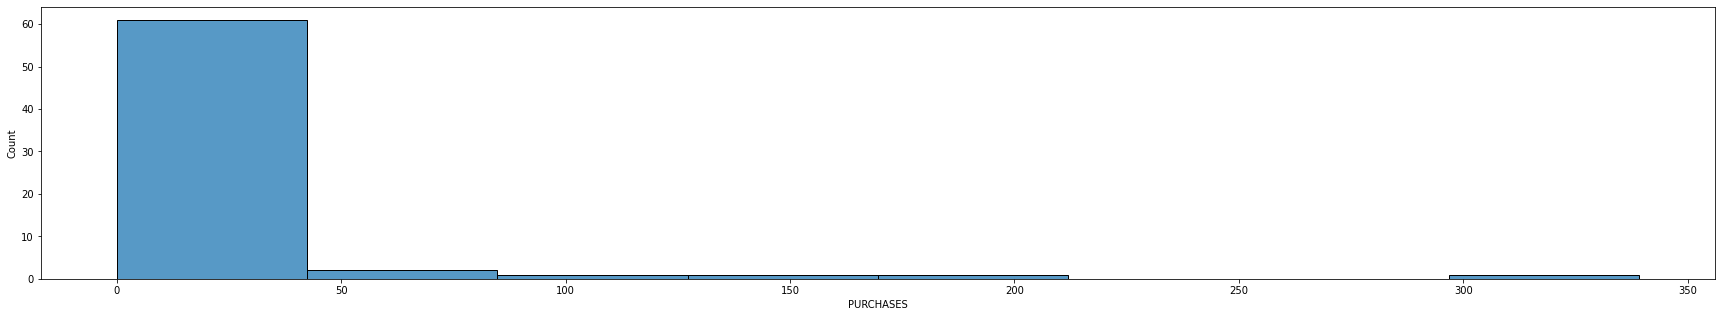

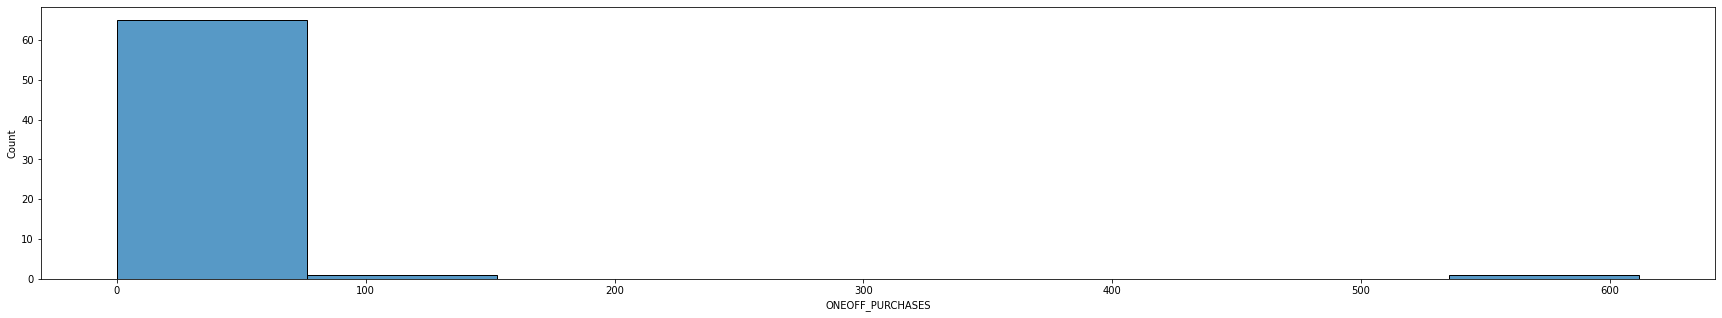

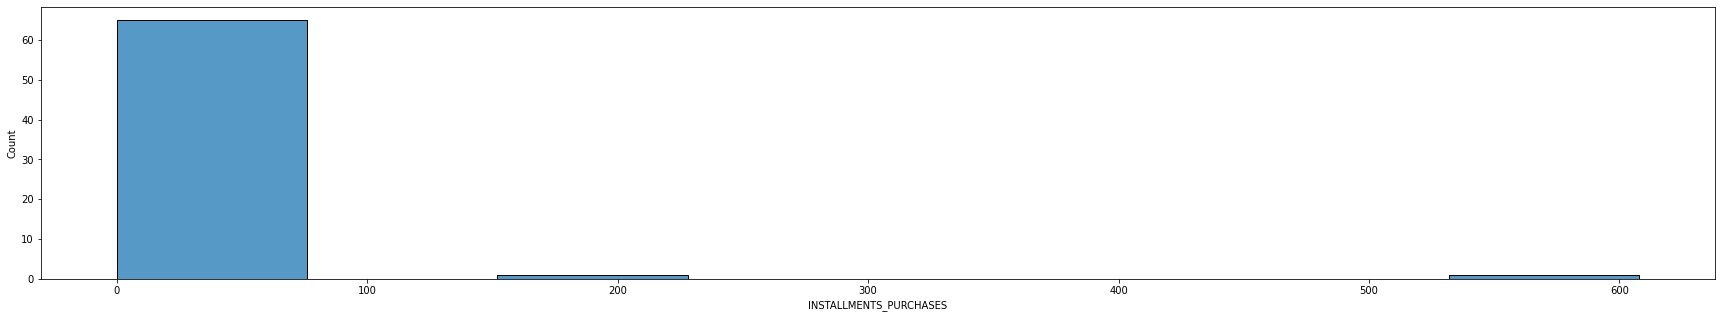

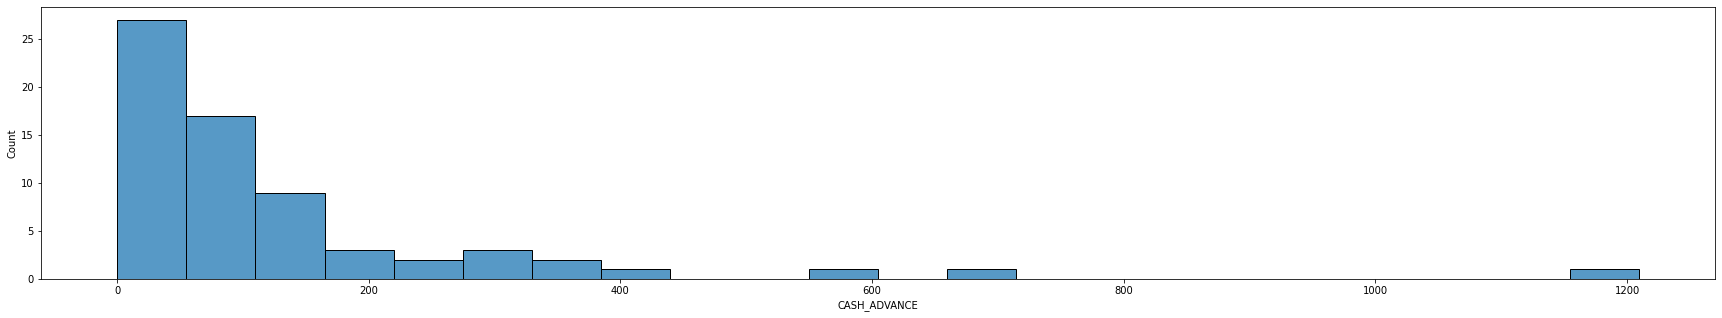

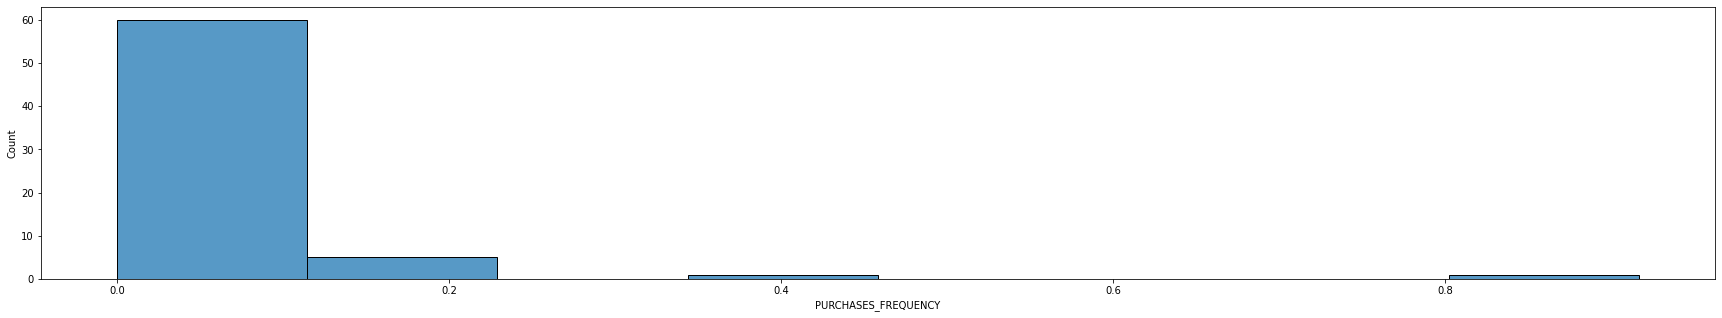

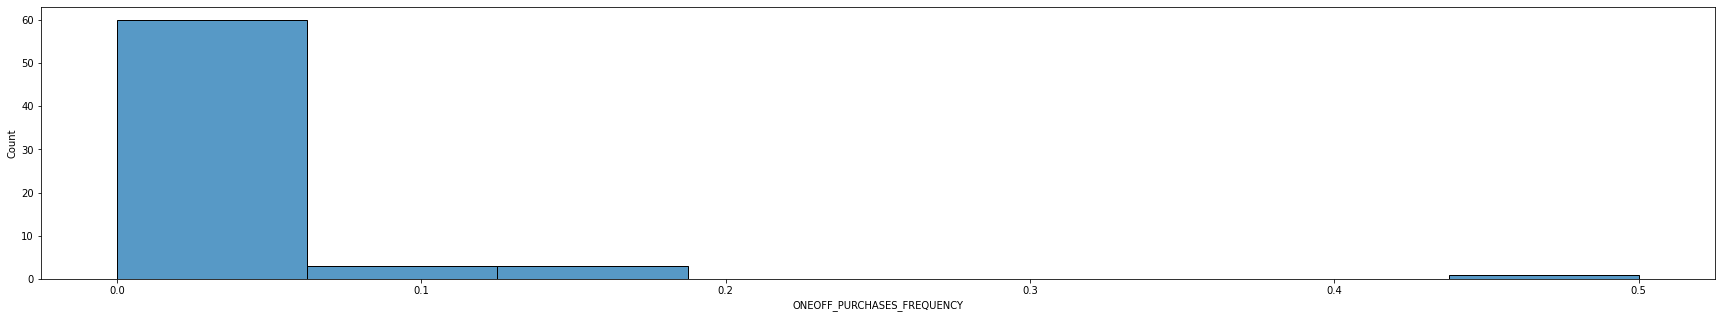

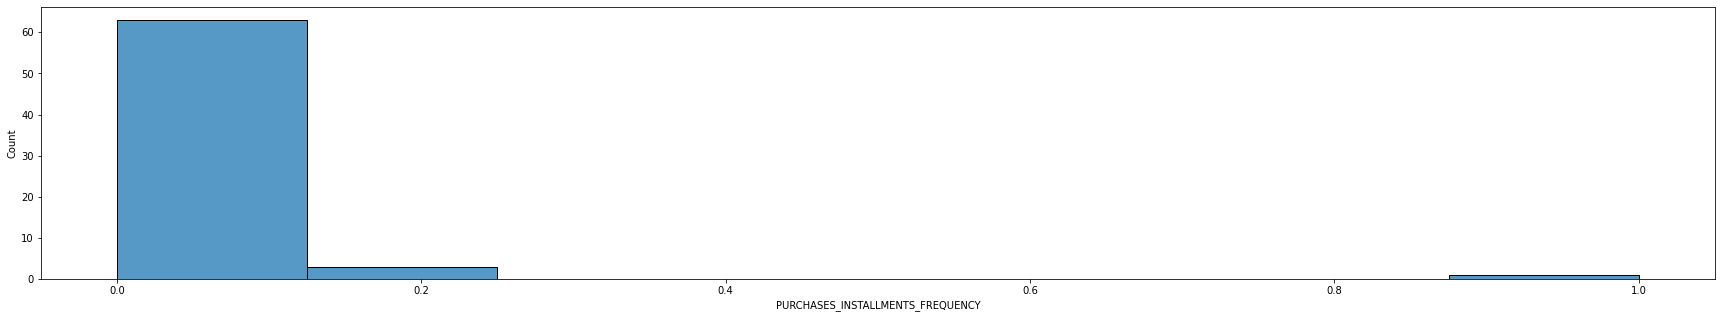

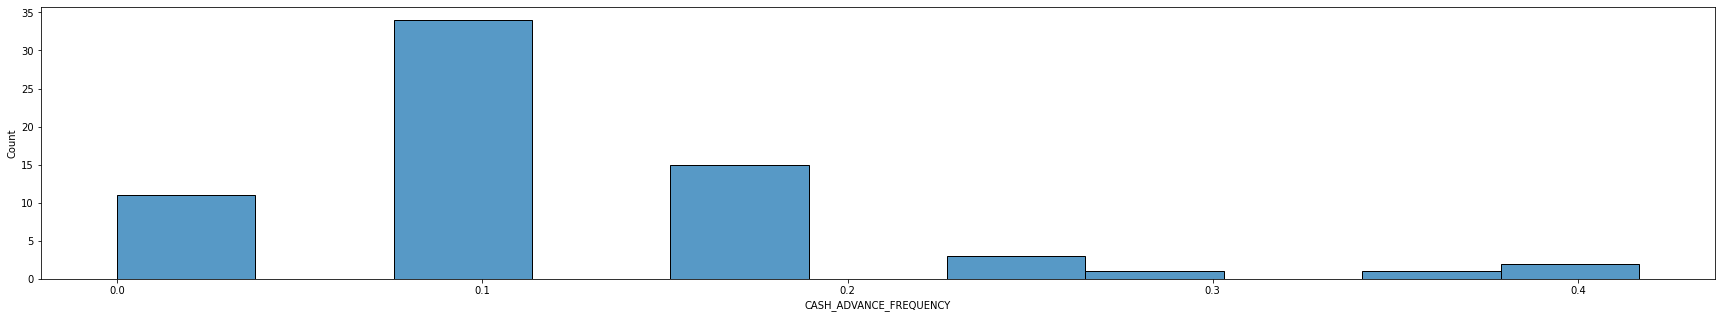

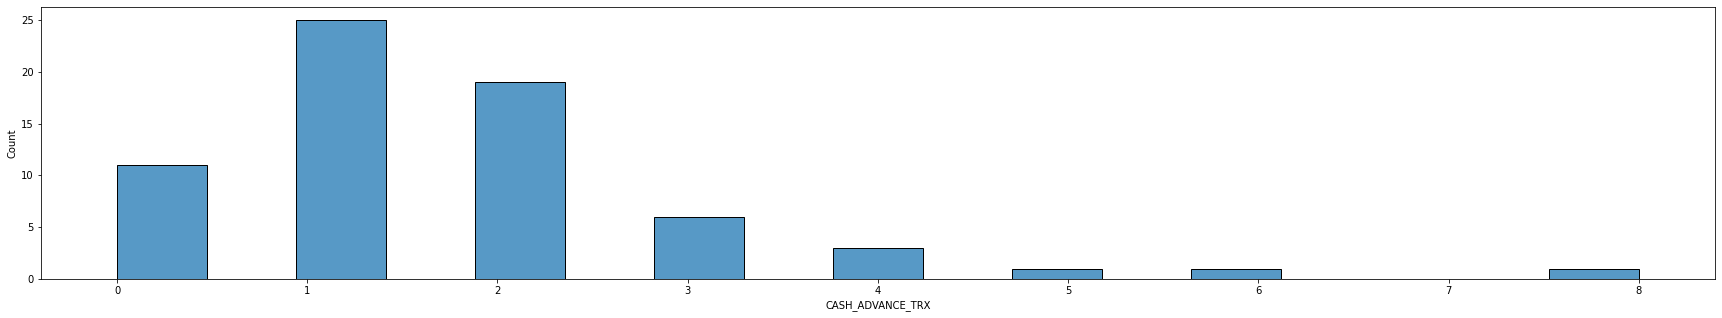

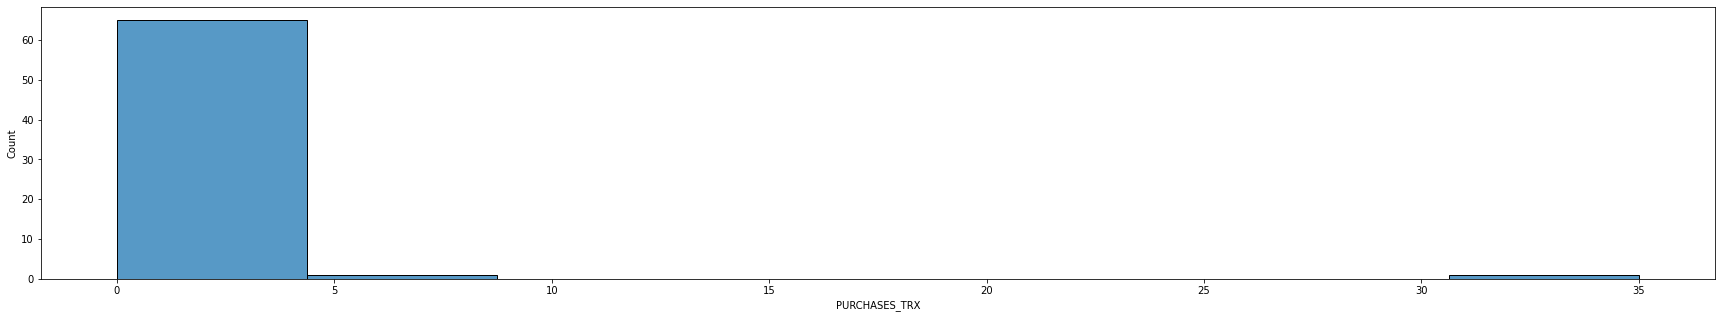

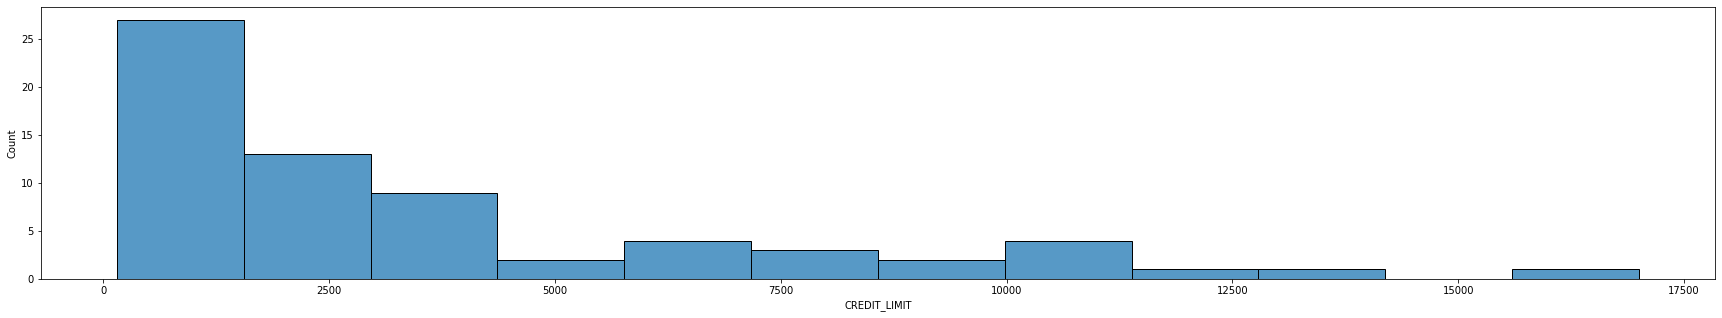

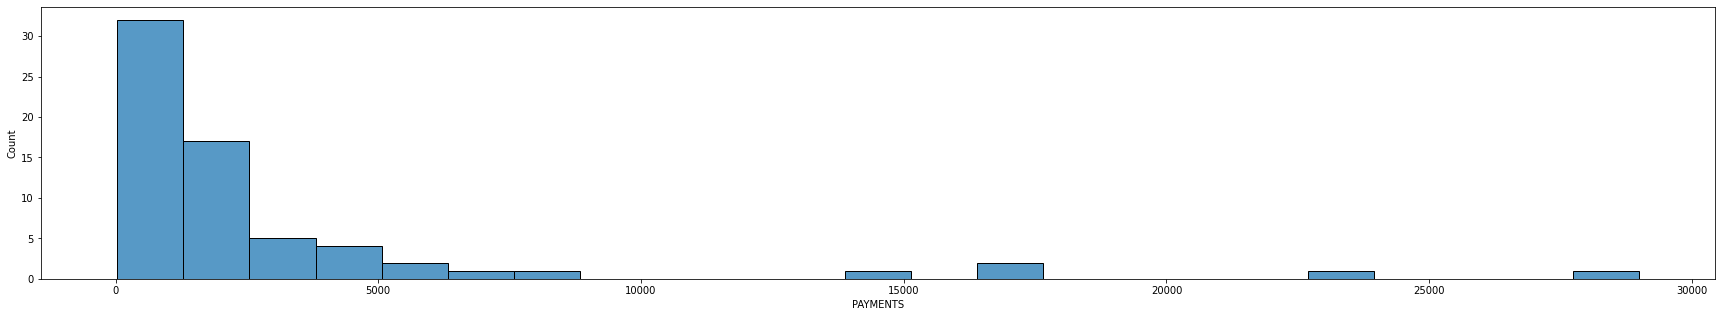

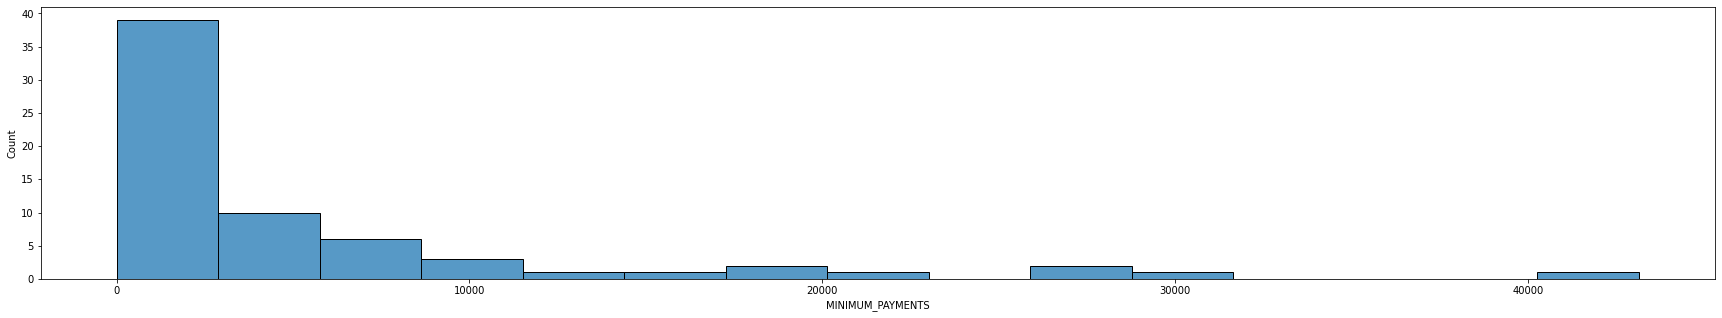

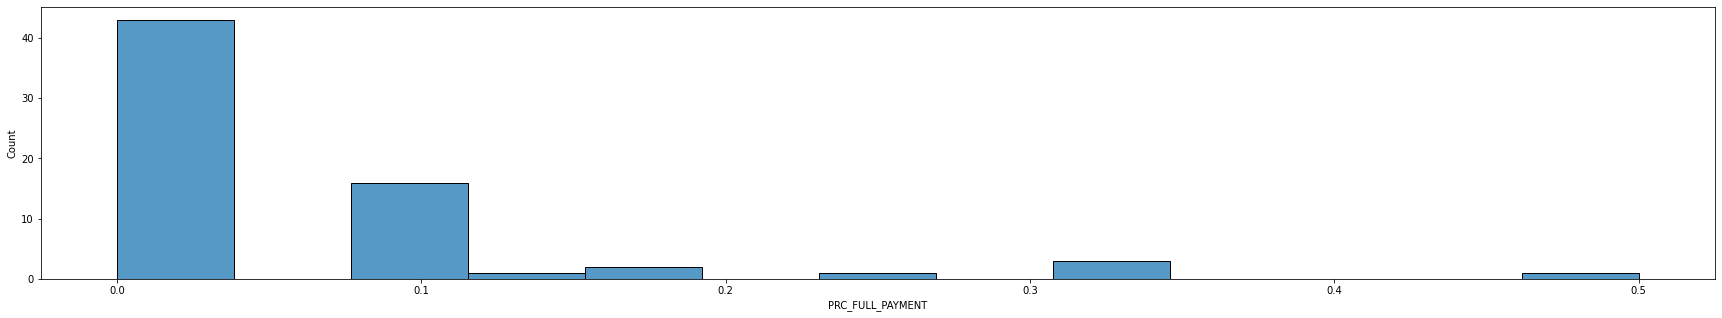

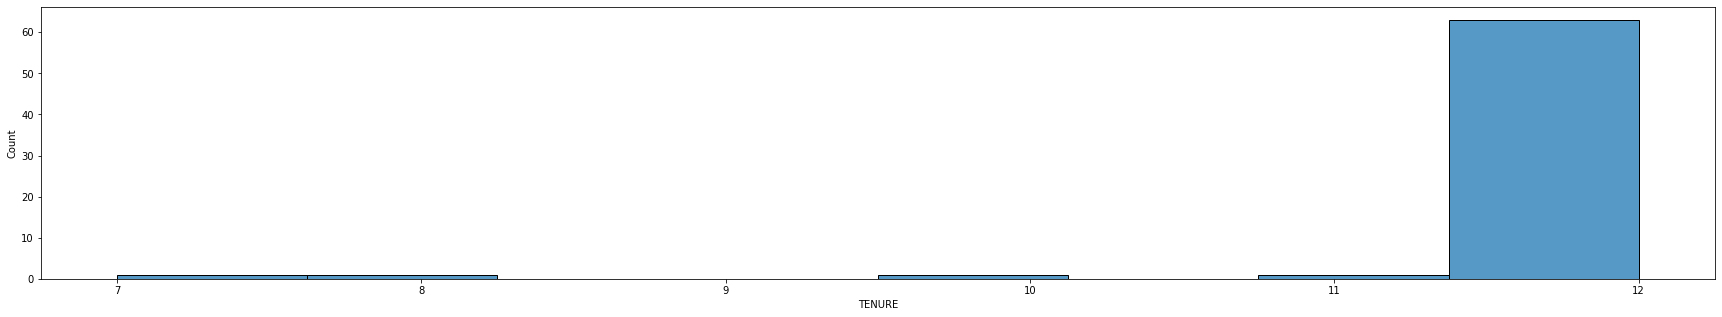

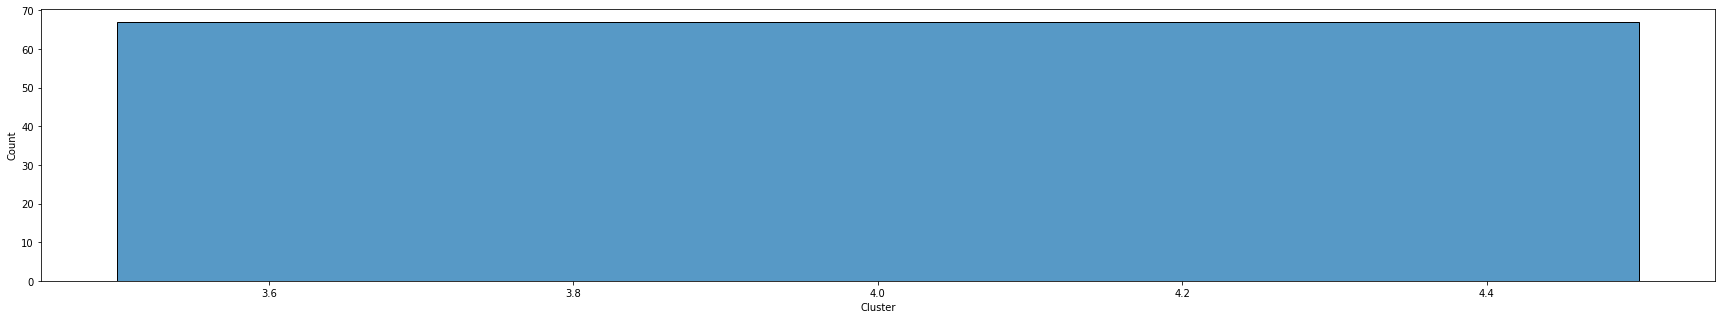

In [115]:
cluster4_gau = data_clustered1[
    (data_clustered1['Cluster'] == 4)
]
for column in cluster4_gau.columns:
    plt.figure(figsize = (30,5))
    sns.histplot(cluster4_gau[column])
    plt.show()

Karakteristik cluster 4 :
- Balance/Saldo : Sedikit pemegang kartu mempunyai saldo hingga 4.000
- Balance Frekuensi/Saldo sering diperbaharui : Saldo pemegang kartu sering diperbaharui
- Purchases/Pembelian : pemegang kartu tidak suka membeli
- ONEOFPURCHASES/Pembelian sekali jalan : pemegang kartu tidak suka membeli dengan sekali jalan
- INSTALLMENTPURCHASES/Pembelian dengan mencicil : pemegang kartu tidak suka mencicil
- CASHADVANCE/Tunai : pemegang kartu berbelanja dengan tunai hingga 400
- CREDITLIMIT/Limit kartu kredit : pemegang kartu mempunyai limit kartu kredit hingga besaran 15.000 dan hanya beberapa orang
- PAYMENTS/Pembayaran : pemegang kartu melakukan pembayaran sesuai dengan limit kartu kredit
- TENURE/Jangka waktu layanan kartu kredit : pemegang kartu memanfaatkan jangka waktu yang lama hingga 12 bulan

Saya mengasumsikan cluster 4 ini adalah silver, karena lebih besar saldonya daripada kategori bronze dan mempunyai limit yang bervariasi hingga 15.000